In [1]:
import pandas as pd
import numpy as np
import sys
from pyspark.sql import functions as f
import re
from functools import reduce
from pyspark.sql import SparkSession
from typing import Dict
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType, FloatType
from pandas.tseries.offsets import MonthEnd
from datetime import datetime
import re
from pyspark.sql.window import Window
import plotly.express as px
from pyspark.ml.feature import Bucketizer
from itertools import chain
from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
pd.set_option('display.max_columns', 200)

In [3]:
spark.sql('select max(report_dt) from prod_dadm_alm_sbx.almde_ul_crd_trnch_schedule_new1').collect()

[Row(max(report_dt)=datetime.datetime(2024, 3, 31, 0, 0))]

In [10]:
spark.sql('select max(report_dt) from prod_dadm_alm_sbx.almde_ul_crdt_new12').collect()

[Row(max(report_dt)=datetime.datetime(2024, 3, 31, 0, 0))]

In [5]:
#!pip install scikit-learn --force
#!pip install catboost
#!pip install ipywidgets --force

In [2]:
df = pd.read_parquet('features_df.parquet')

In [4]:
df.head()

objectid report_date  escrow_inflow  S_inflow  S_object  \
3636   31459.0  2016-03-31            NaN       NaN   54721.0   
3637   31459.0  2016-04-30            NaN       NaN   54721.0   
3638   31459.0  2016-05-31            NaN       NaN   54721.0   
3639   31459.0  2016-06-30            NaN       NaN   54721.0   
3640   31459.0  2016-07-31            NaN       NaN   54721.0   

     object_open_date object_close_date escrow_plan_close escrow_fact_close  \
3636       2012-07-02        2022-09-30               NaT               NaT   
3637       2012-07-02        2022-09-30               NaT               NaT   
3638       2012-07-02        2022-09-30               NaT               NaT   
3639       2012-07-02        2022-09-30               NaT               NaT   
3640       2012-07-02        2022-09-30               NaT               NaT   

     escrow_object_open_date escrow_status region_num  mean_price_per_metr  \
3636                     NaT        Закрыт         36                  NaN   
3637                     NaT        Закрыт         36                  NaN   
3638                     NaT        Закрыт         36                  NaN   
3639                     NaT        Закрыт         36                  NaN   
3640                     NaT        Закрыт         36                  NaN   

      escrow_volume  S_volume escrow_max_plan_close escrow_max_fact_close  \
3636            0.0       0.0            2023-09-30            2023-07-03   
3637            0.0       0.0            2023-09-30            2023-07-03   
3638            0.0       0.0            2023-09-30            2023-07-03   
3639            0.0       0.0            2023-09-30            2023-07-03   
3640            0.0       0.0            2023-09-30            2023-07-03   

     escrow_object_min_open_date  open_date close_date escrow_min_open_dt  \
3636                  2012-07-02 2016-03-22 2023-07-03         2020-04-30   
3637                  2012-07-02 2016-03-22 2023-07-03         2020-04-30   
3638                  2012-07-02 2016-03-22 2023-07-03         2020-04-30   
3639                  2012-07-02 2016-03-22 2023-07-03         2020-04-30   
3640                  2012-07-02 2016-03-22 2023-07-03         2020-04-30   

     escrow_max_open_dt  S_escrow/S_object  S_escrow  S_share         S  \
3636         2023-05-31           0.725381  39693.55      0.0  39693.55   
3637         2023-05-31           0.725381  39693.55      0.0  39693.55   
3638         2023-05-31           0.725381  39693.55      0.0  39693.55   
3639         2023-05-31           0.725381  39693.55      0.0  39693.55   
3640         2023-05-31           0.725381  39693.55      0.0  39693.55   

      key_rate  key_rate_diff  key_rate-key_rate_mean_3  \
3636      11.0            0.0                  0.000000   
3637      11.0            0.0                  0.000000   
3638      11.0            0.5                  0.000000   
3639      10.5            0.0                 -0.500000   
3640      10.5            0.0                 -0.333333   

      key_rate-key_rate_mean_6  key_rate-key_rate_mean_12  months_after_open  \
3636                  0.000000                  -0.708333                  0   
3637                  0.000000                  -0.458333                  1   
3638                  0.000000                  -0.208333                  2   
3639                 -0.500000                  -0.583333                  3   
3640                 -0.416667                  -0.500000                  4   

      months_before_close  share_months_to_close  december_nums  \
3636                   88               0.000000              0   
3637                   87               0.011364              0   
3638                   86               0.022727              0   
3639                   85               0.034091              0   
3640                   84               0.045455              0   

      S_share_shift_3  
3636              0.0  
3637   

73.0 86.0
1.3491351936124687
S_inflow    1.0
dtype: float64


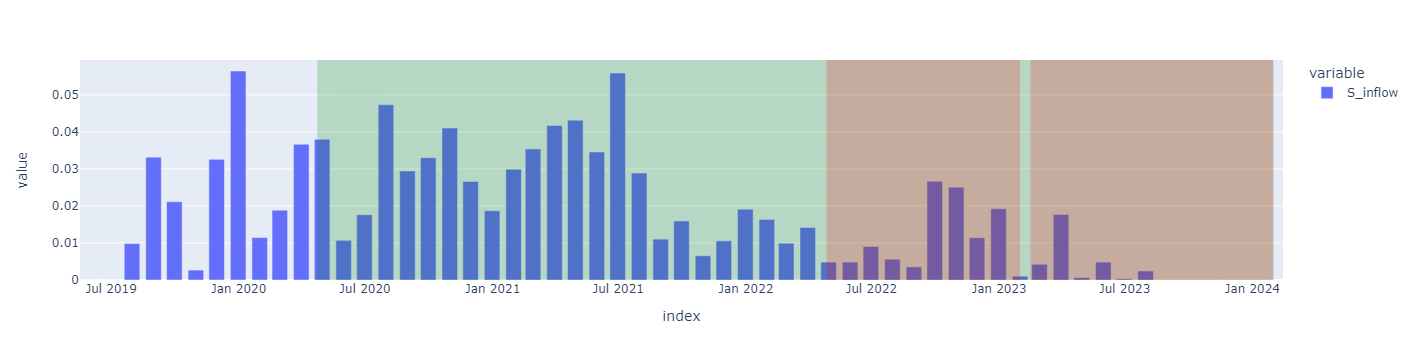

59.0 64.0
1.0
S_inflow    1.0
dtype: float64


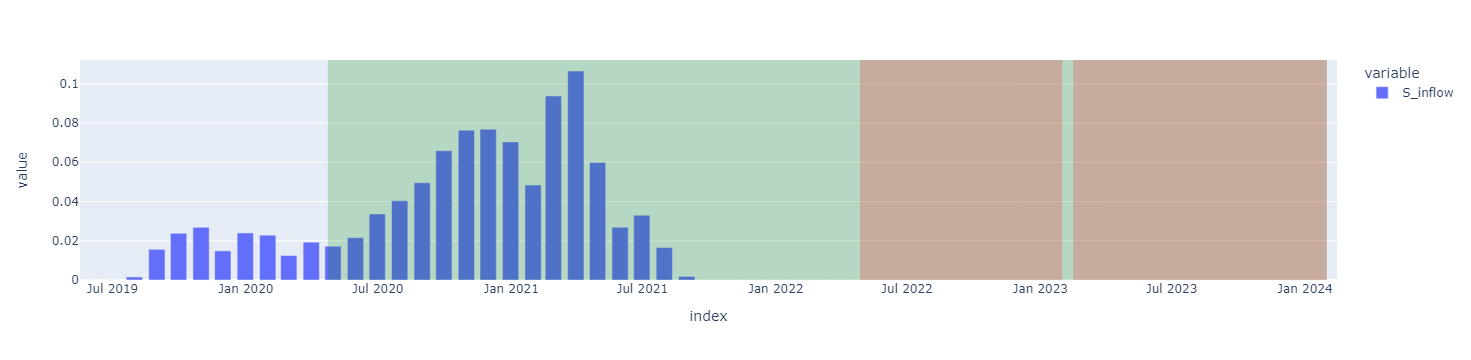

55.25 63.75
1.0339275788449098
S_inflow    1.0
dtype: float64


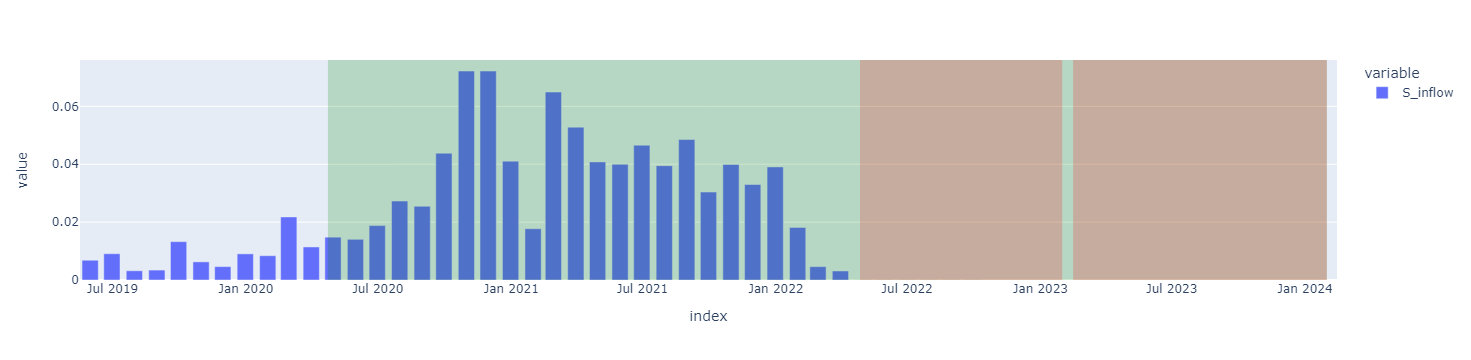

65.0 70.5
1.0694984953324609
S_inflow    1.0
dtype: float64


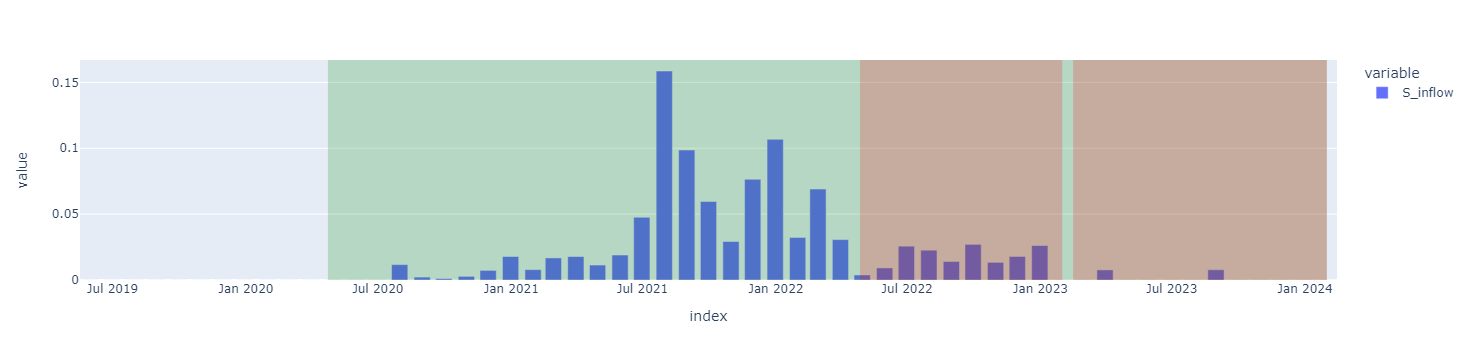

49.0 67.75
1.0603950512034044
S_inflow    1.0
dtype: float64


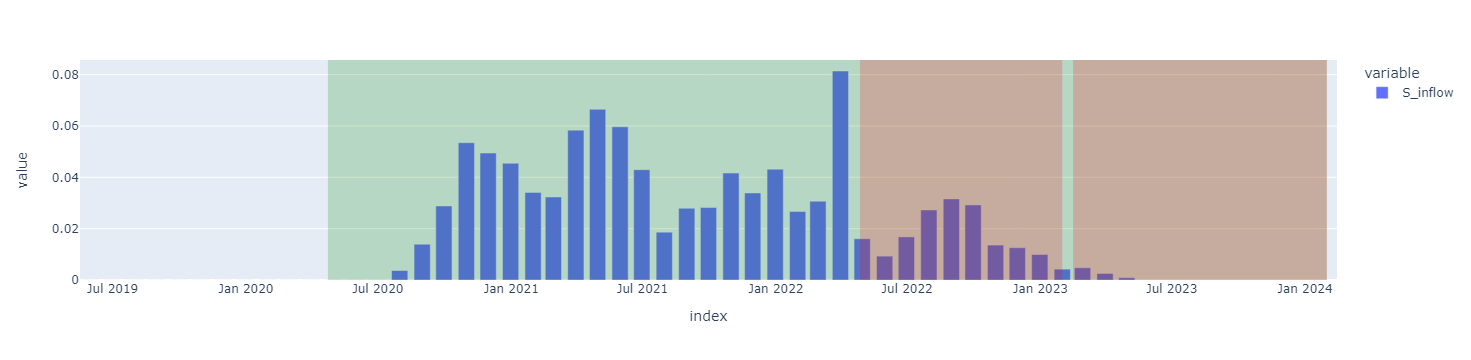

39.0 58.5
1.080331704997646
S_inflow    1.0
dtype: float64


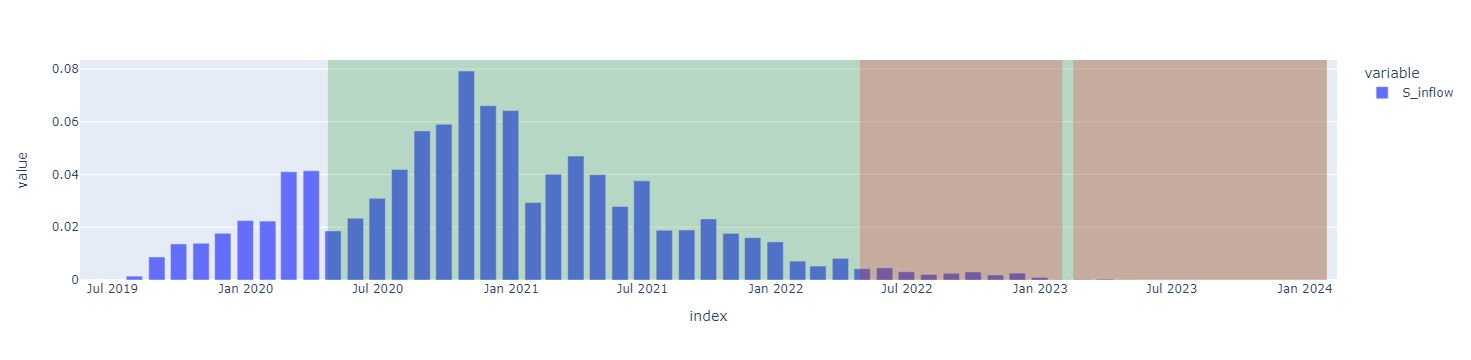

29.0 54.0
1.2754430199589164
S_inflow    1.0
dtype: float64


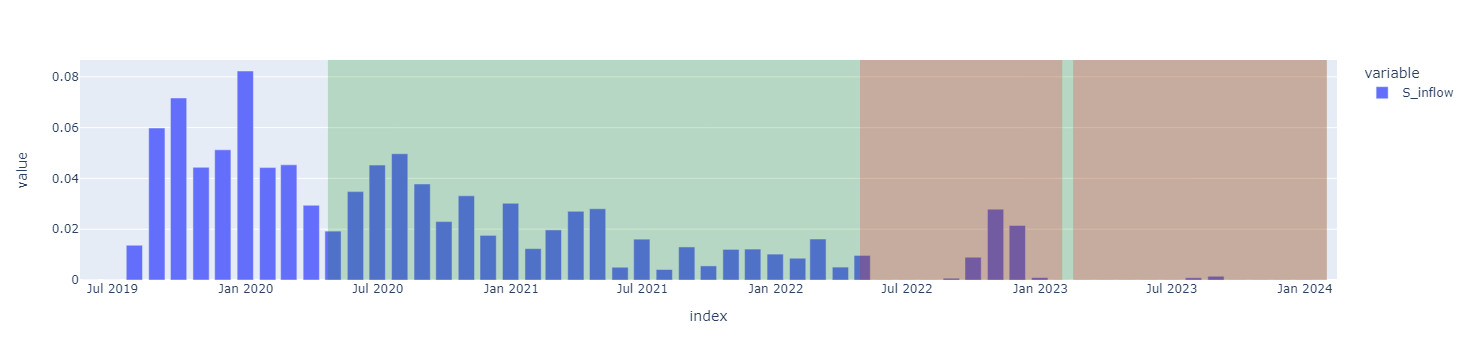

35.5 53.25
1.009153331250991
S_inflow    1.0
dtype: float64


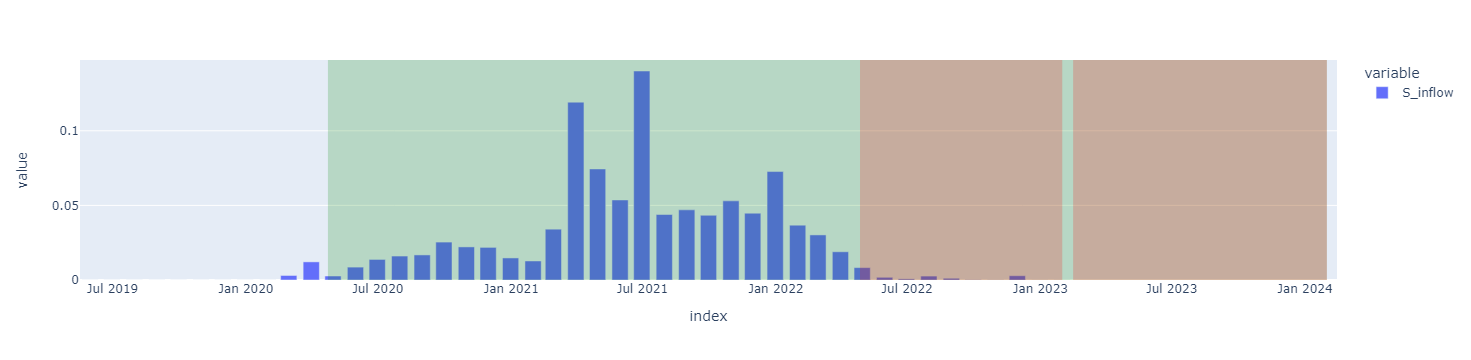

26.25 39.25
1.0257051844730765
S_inflow    1.0
dtype: float64


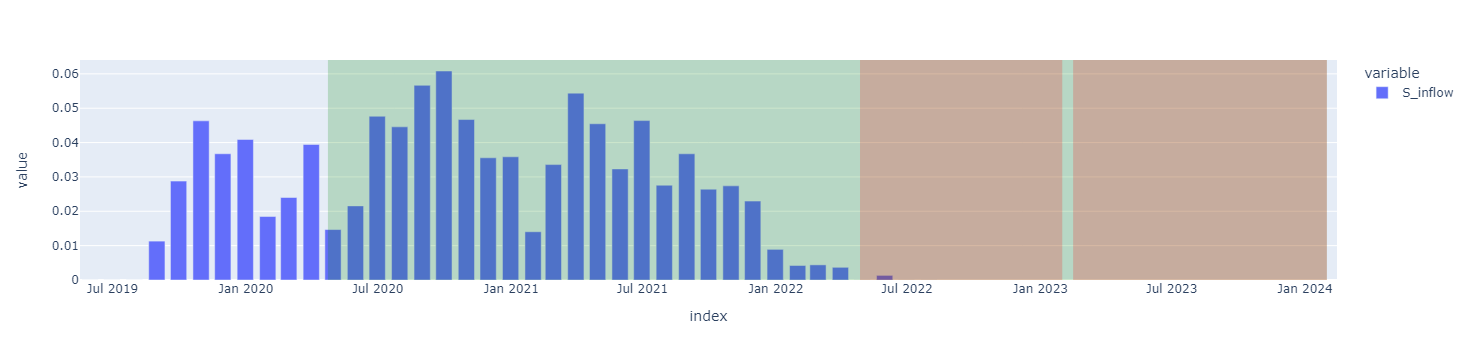

17.5 31.0
1.0954592783168846
S_inflow    1.0
dtype: float64


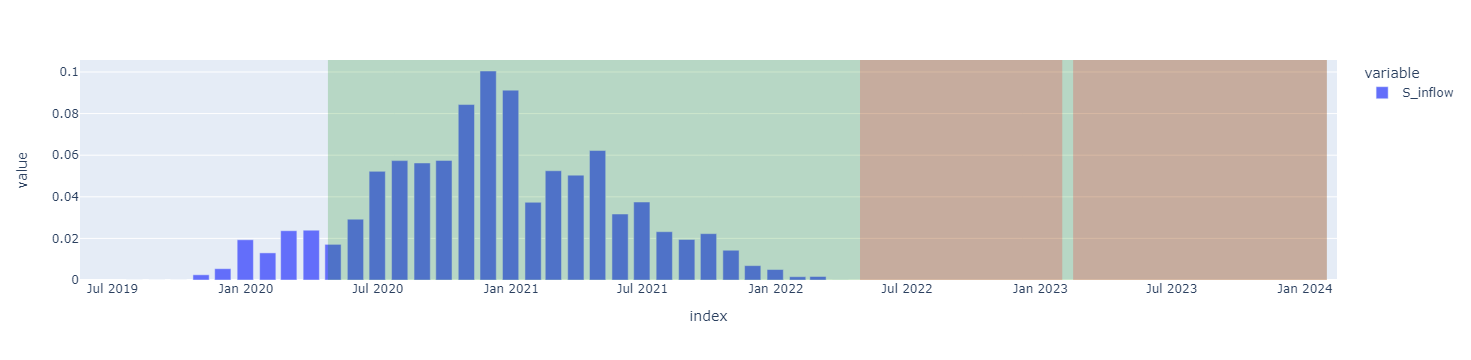

22.0 32.0
1.015767820041758
S_inflow    1.0
dtype: float64


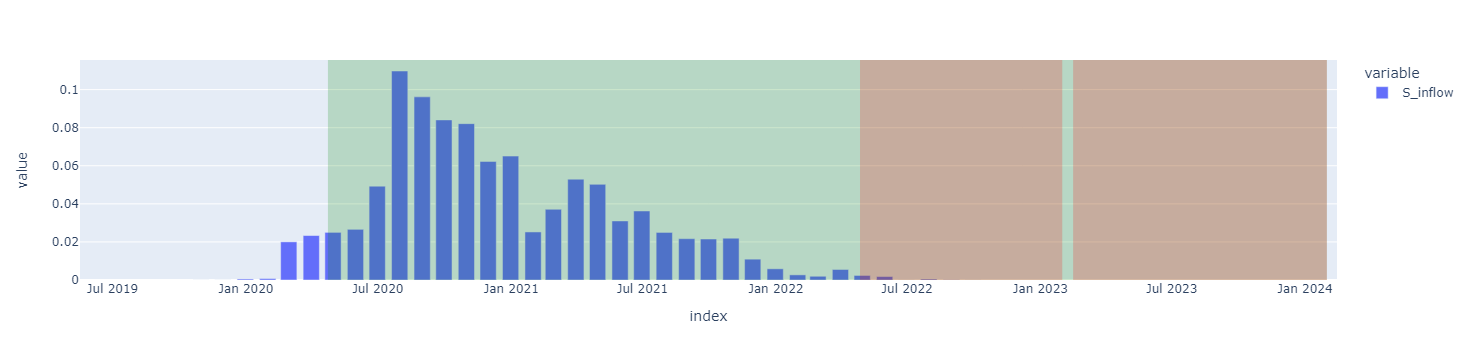

19.0 36.0
1.054332221864364
S_inflow    1.0
dtype: float64


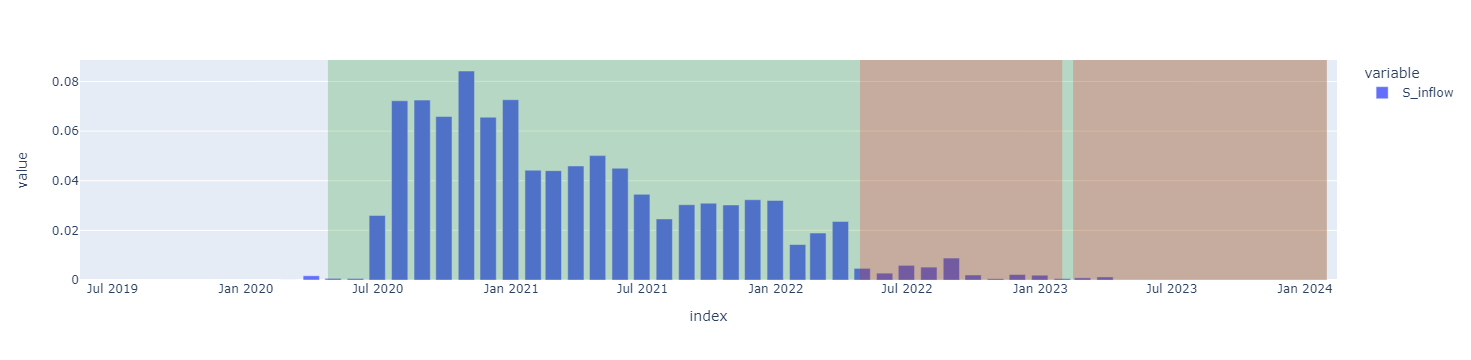

17.25 35.0
1.1245452715059032
S_inflow    1.0
dtype: float64


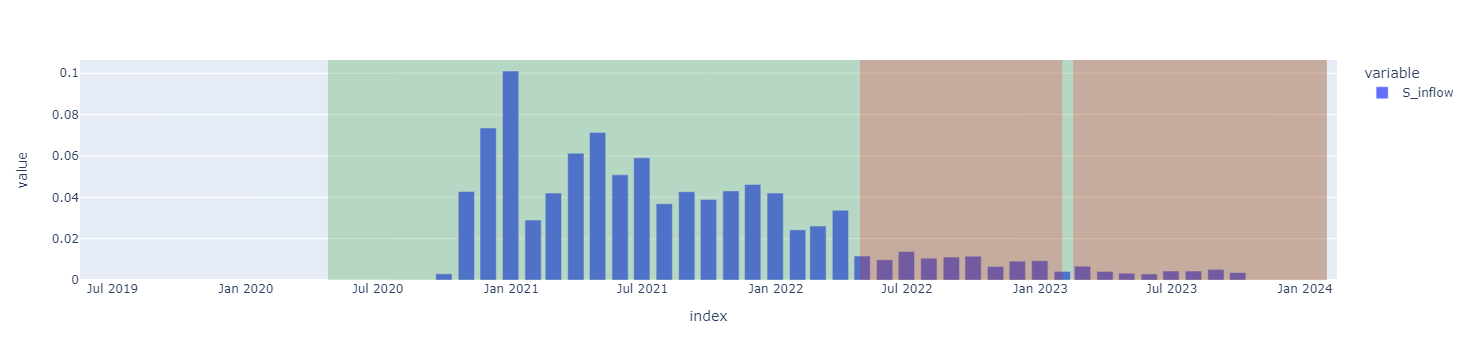

20.0 35.0
1.0375213000440193
S_inflow    1.0
dtype: float64


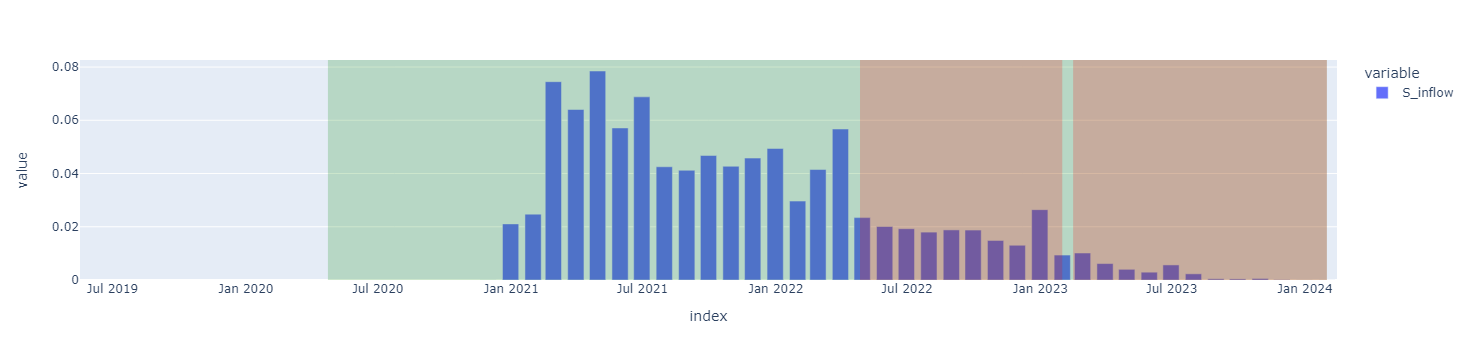

20.0 29.5
1.0437065926071112
S_inflow    1.0
dtype: float64


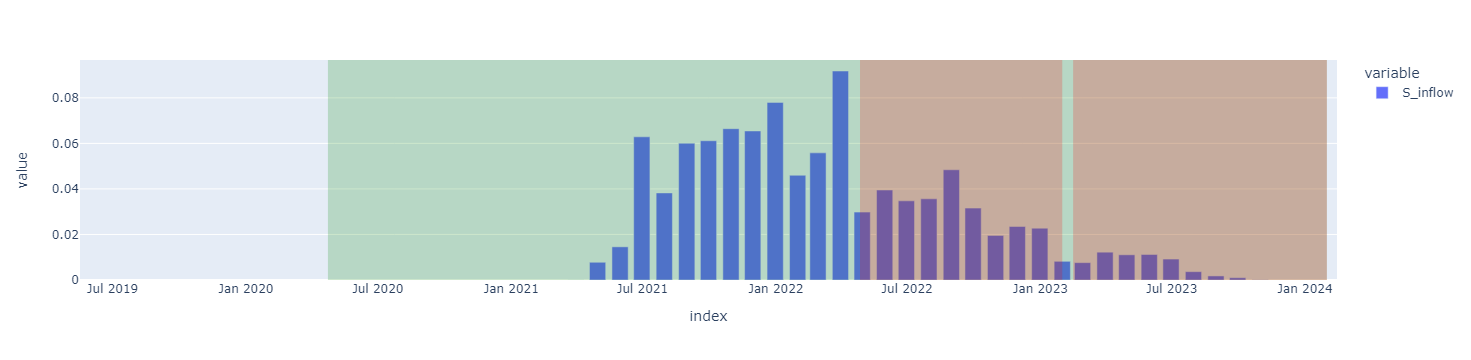

17.0 27.0
1.0013459285006903
S_inflow    0.959358
dtype: float64


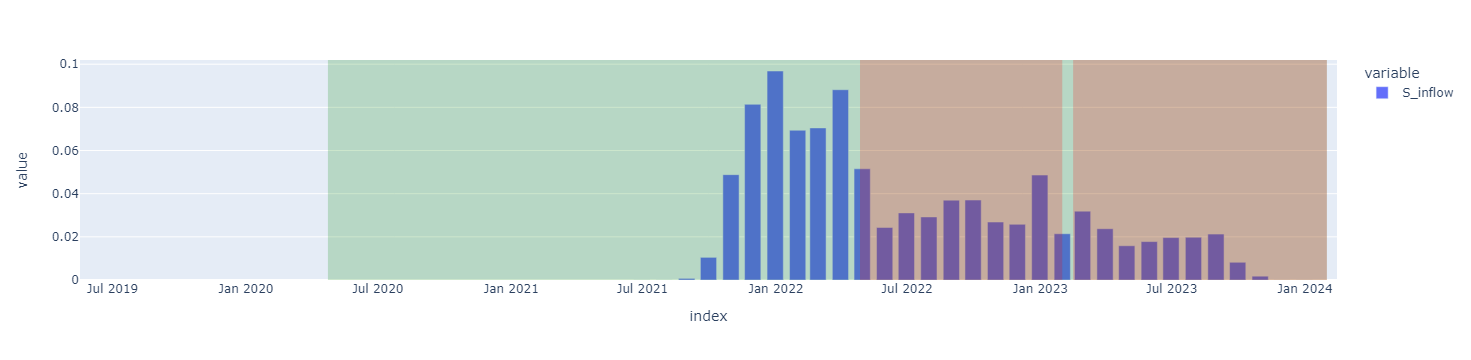

19.5 24.0
0.9788563332407997
S_inflow    0.950257
dtype: float64


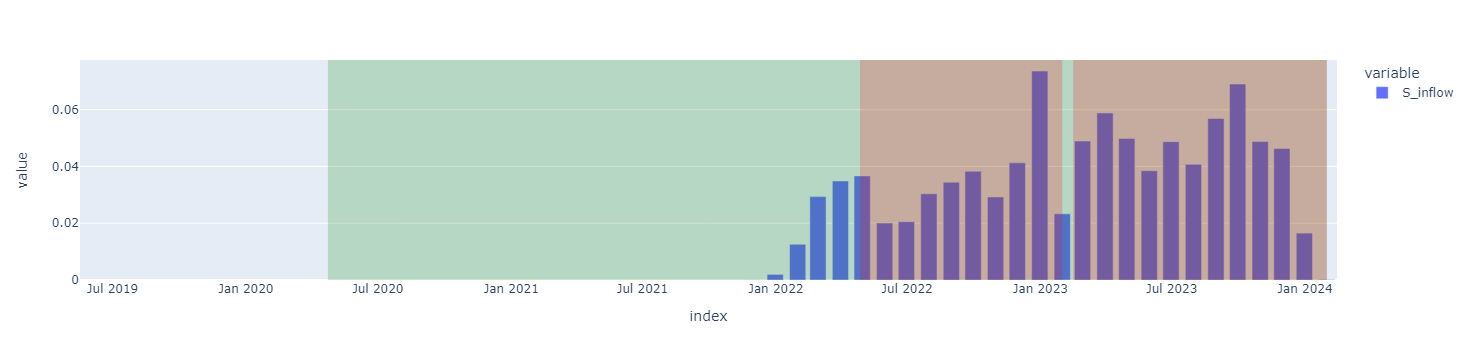

22.0 22.0
1.0000000000000002
S_inflow    1.0
dtype: float64


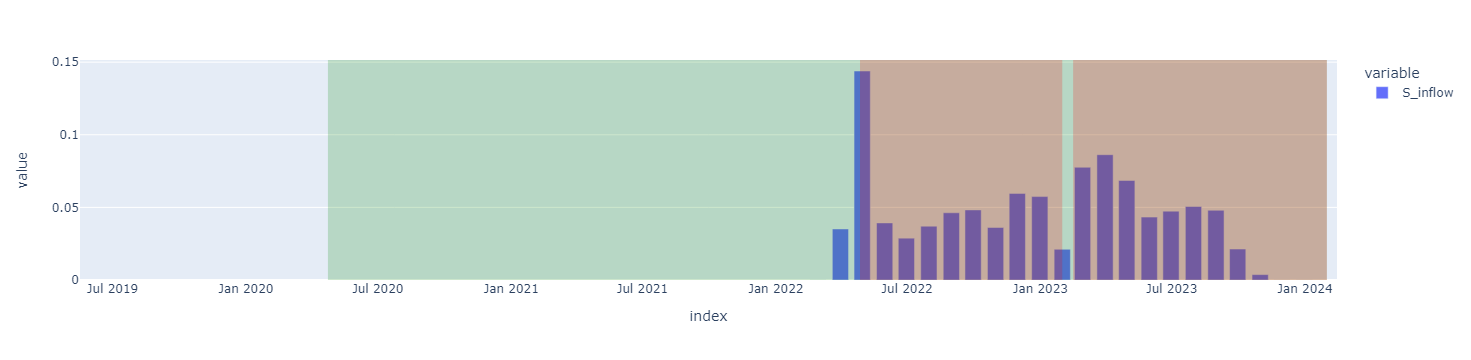

ValueError: cannot insert objectid, already exists

In [112]:
df['report_date'].unique()
horizon = 4
date_left = pd.to_datetime('2019-01-31')

lgot_list = [
    (pd.to_datetime('2020-04-23'), pd.to_datetime('2024-01-31'), 'green'),
    (pd.to_datetime('2022-04-27'), pd.to_datetime('2023-01-31'), 'red'),
    (pd.to_datetime('2023-02-15'), pd.to_datetime('2024-01-31'), 'red')
    
]

for date_left in sorted(df['report_date'].unique())[3::horizon]:
    date_left = pd.to_datetime(date_left)
    date_right = date_left + MonthEnd(horizon)
    #display(df[df['open_date'].between(date_left, date_right)])
    df_filtered = df[df['open_date'].between(date_left, date_right) & (df['close_date'] < pd.to_datetime('2024-02-29'))]
    
    df_maturity = df_filtered.groupby('objectid').agg({'months_after_open': 'max'})
    #px.histogram(df_maturity, nbins=30).show()
    
    df_inflow = df_filtered.groupby('objectid').apply(lambda df: df.assign(
                                                            project_maturity = df['months_after_open'].max(),
                                                            S_share_inflow = df['S_inflow']/df['S']).fillna(0)).reset_index()
    left_q = df_maturity.quantile(0.25)[0]
    right_q = df_maturity.quantile(0.75)[0]
    print(left_q, right_q)
    cond = df_inflow['project_maturity'].between(left_q, right_q) if len(df_maturity) > 5 else [True] * df_inflow.shape[0]
    
    agg_df = df_inflow[cond].groupby('report_date').agg({'S_inflow': 'sum', 'S': 'sum'})
    agg_df = agg_df['S_inflow']/agg_df['S']
    
    print(agg_df.sum())
    
    agg_df1 = df_inflow[cond].groupby('report_date').agg({'S_inflow': 'sum'}) / df_inflow[cond].groupby('objectid').agg({'S': 'first'}).sum()[0]
    print(agg_df1.sum())
    
    agg_df2 = pd.concat([df_.set_index('report_date')['S_share_inflow'] for _, df_ in df_inflow[cond].groupby('objectid')], axis = 1).mean(axis = 1)
    
    fig = px.bar(pd.concat([pd.DataFrame(index = pd.date_range('2019-05-31', '2024-01-31', freq = 'M')), 
                      agg_df1[(pd.to_datetime('2019-05-31') <= agg_df1.index) & (agg_df1.index <= pd.to_datetime('2024-01-31'))]], axis = 1))
    
    for d1, d2, color in lgot_list:
        fig.add_vrect(d1, d2, line_width = 0, fillcolor = color, opacity = 0.2)
    
    fig.show()
    #px.line(df[df['report_date'].between(pd.to_datetime('2019-05-31'), pd.to_datetime('2024-01-31'))].groupby('report_date').agg({'key_rate': 'first'})).show()
    #
    #px.bar(pd.concat([pd.DataFrame(index = pd.date_range('2019-05-31', '2024-01-31', freq = 'M')), 
    #                  agg_df1[(pd.to_datetime('2019-05-31') <= agg_df.index) & (agg_df.index <= pd.to_datetime('2024-01-31'))]], axis = 1)).show()
    #
    #px.bar(pd.concat([pd.DataFrame(index = pd.date_range('2019-05-31', '2024-01-31', freq = 'M')), 
    #                  agg_df2[(pd.to_datetime('2019-05-31') <= agg_df.index) & (agg_df.index <= pd.to_datetime('2024-01-31'))]], axis = 1)).show()

In [85]:
df

objectid report_date  escrow_inflow  S_inflow   S_object  \
3636    31459.0  2016-03-31            NaN       NaN   54721.00   
3637    31459.0  2016-04-30            NaN       NaN   54721.00   
3638    31459.0  2016-05-31            NaN       NaN   54721.00   
3639    31459.0  2016-06-30            NaN       NaN   54721.00   
3640    31459.0  2016-07-31            NaN       NaN   54721.00   
...         ...         ...            ...       ...        ...   
18174   30390.0  2036-08-31            NaN       NaN  105811.56   
18175   30390.0  2036-09-30            NaN       NaN  105811.56   
18176   30390.0  2036-10-31            NaN       NaN  105811.56   
18177   30390.0  2036-11-30            NaN       NaN  105811.56   
18178   30390.0  2036-12-31            NaN       NaN  105811.56   

      object_open_date object_close_date escrow_plan_close escrow_fact_close  \
3636        2012-07-02        2022-09-30               NaT               NaT   
3637        2012-07-02        2022-09-30               NaT               NaT   
3638        2012-07-02        2022-09-30               NaT               NaT   
3639        2012-07-02        2022-09-30               NaT               NaT   
3640        2012-07-02        2022-09-30               NaT               NaT   
...                ...               ...               ...               ...   
18174       2018-06-27        2036-12-31               NaT               NaT   
18175       2018-06-27        2036-12-31               NaT               NaT   
18176       2018-06-27        2036-12-31               NaT               NaT   
18177       2018-06-27        2036-12-31               NaT               NaT   
18178       2018-06-27        2036-12-31               NaT               NaT   

      escrow_object_open_date escrow_status region_num  mean_price_per_metr  \
3636                      NaT        Закрыт         36                  NaN   
3637                      NaT        Закрыт         36                  NaN   
3638                      NaT        Закрыт         36                  NaN   
3639                      NaT        Закрыт         36                  NaN   
3640                      NaT        Закрыт         36                  NaN   
...                       ...           ...        ...                  ...   
18174                     NaT        Открыт         62                  NaN   
18175                     NaT        Открыт         62                  NaN   
18176                     NaT        Открыт         62                  NaN   
18177                     NaT        Открыт         62                  NaN   
18178                     NaT        Открыт         62                  NaN   

       escrow_volume  S_volume escrow_max_plan_close escrow_max_fact_close  \
3636             0.0       0.0            2023-09-30            2023-07-03   
3637             0.0       0.0            2023-09-30            2023-07-03   
3638             0.0       0.0            2023-09-30            2023-07-03   
3639             0.0       0.0            2023-09-30            2023-07-03   
3640             0.0       0.0            2023-09-30            2023-07-03   
...              ...       ...                   ...                   ...   
18174            NaN       NaN            2030-03-31            2023-11-10   
18175            NaN       NaN            2030-03-31            2023-11-10   
18176            NaN       NaN            2030-03-31            2023-11-10   
18177            NaN       NaN            2030-03-31            2023-11-10   
18178            NaN       NaN            2030-03-31            2023-11-10   

      escrow_object_min_open_date  open_date close_date escrow_min_open_dt  \
3636                   2012-07-02 2016-03-22 2023-07-03         2020-04-30   
3637                   2012-07-02 2016-03-22 2023-07-03         2020-04-30   
3638                   2012-07-02 2016-03-22 2023-07-03         2020-04-30   
3639                   2012-07-02 2016-03-2

In [87]:
from sklearn.preprocessing import StandardScaler

73.0 86.0


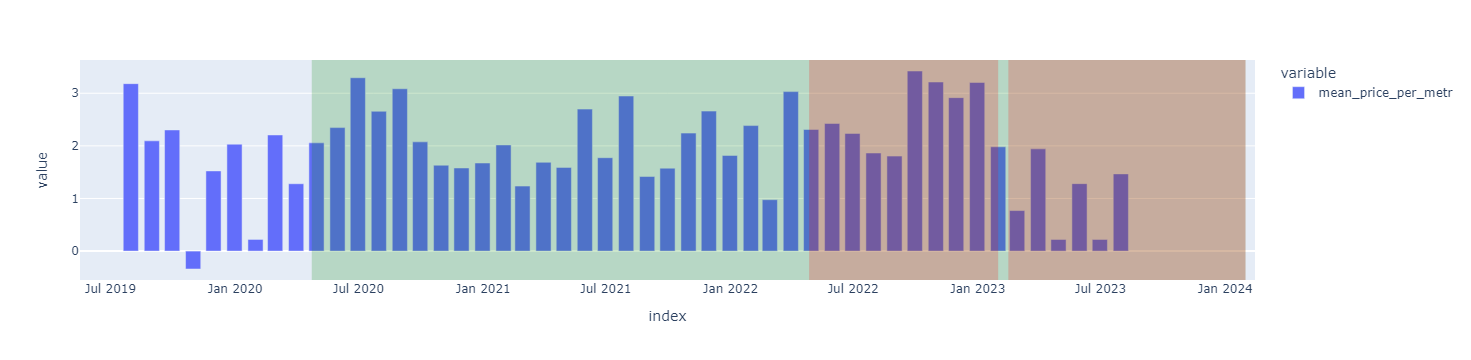

59.0 64.0


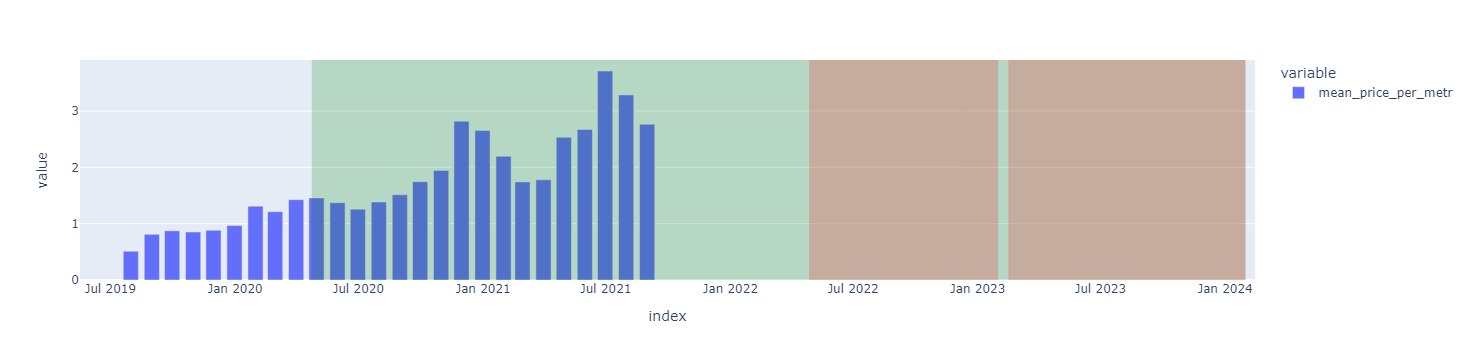

55.25 63.75


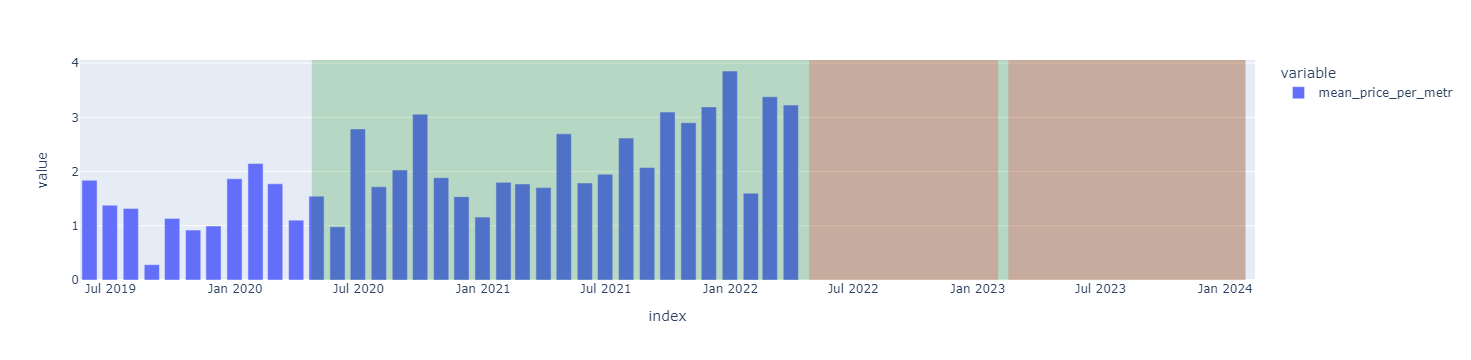

65.0 70.5


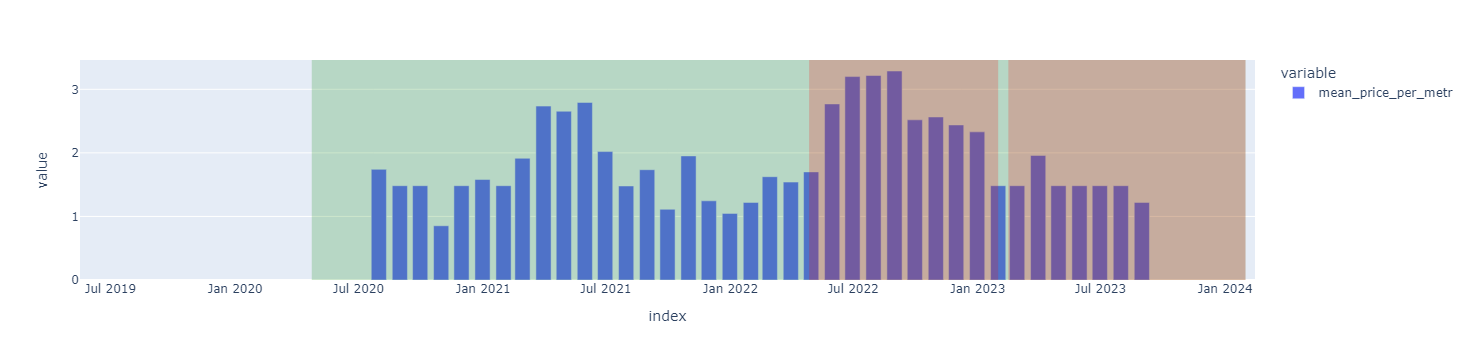

49.0 67.75


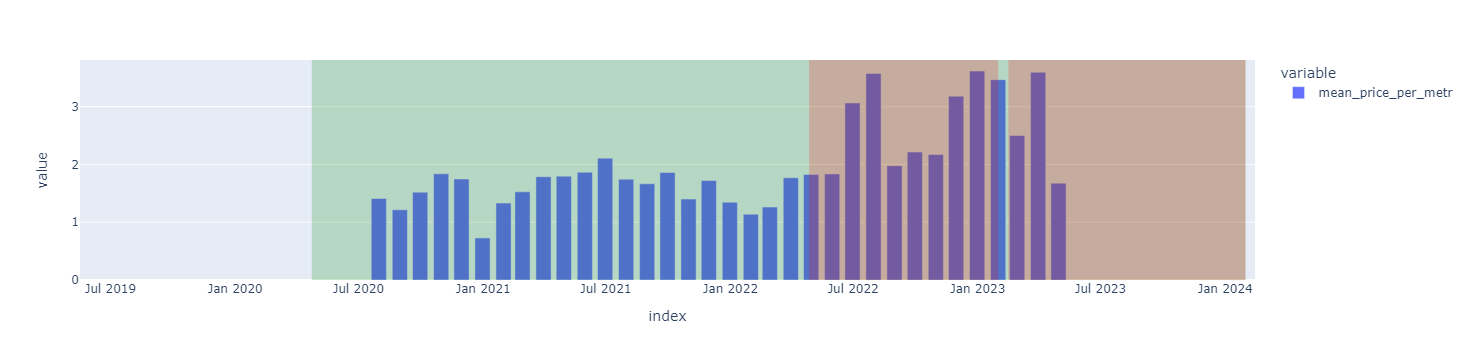

39.0 58.5


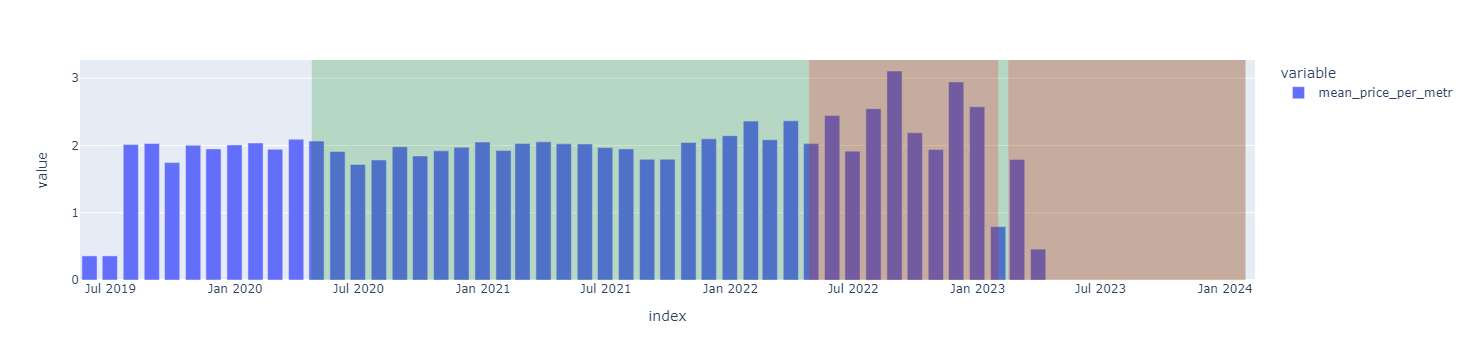

29.0 54.0


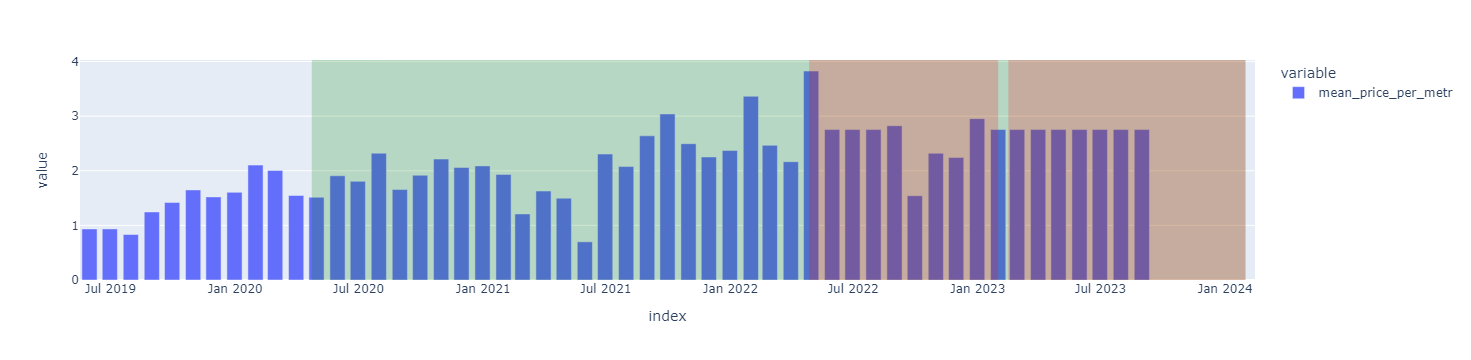

35.5 53.25


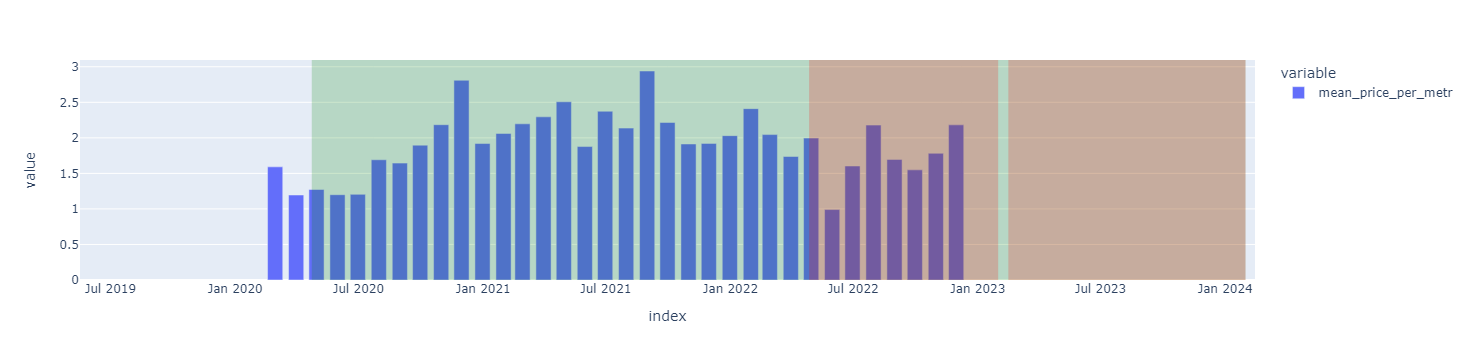

26.25 39.25


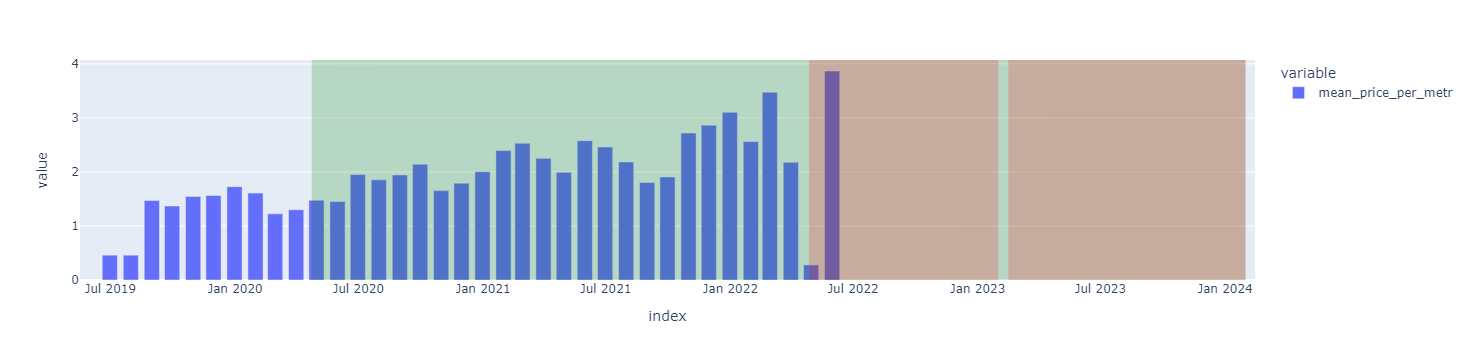

17.5 31.0


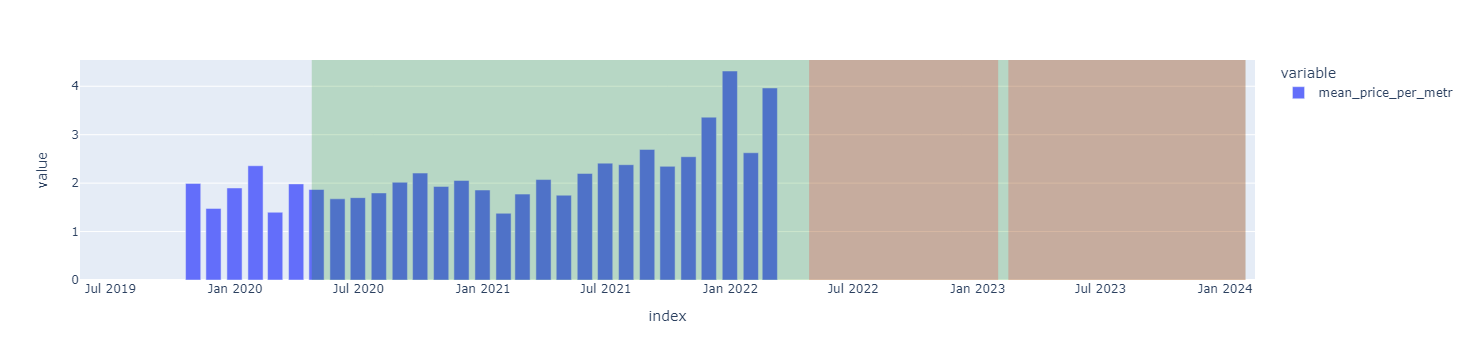

22.0 32.0


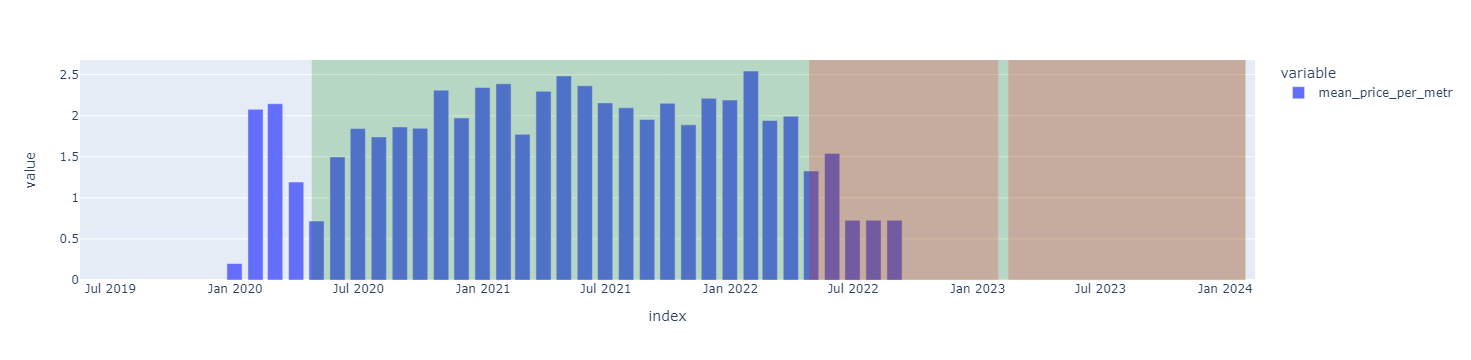

19.0 36.0


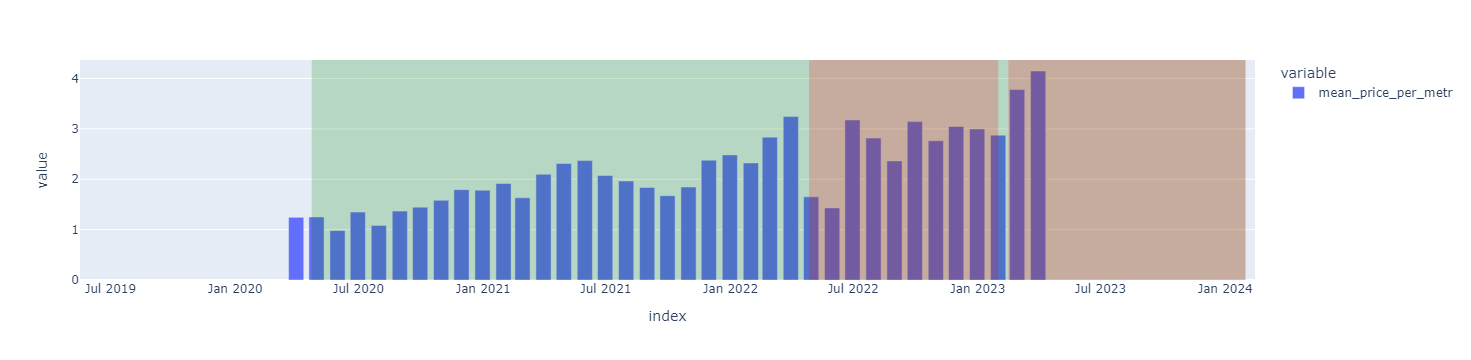

17.25 35.0


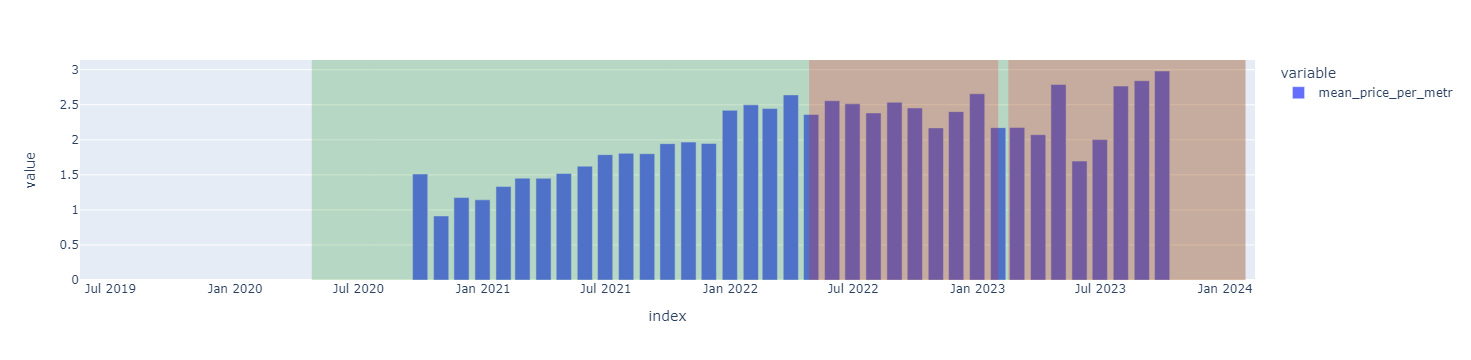

20.0 35.0


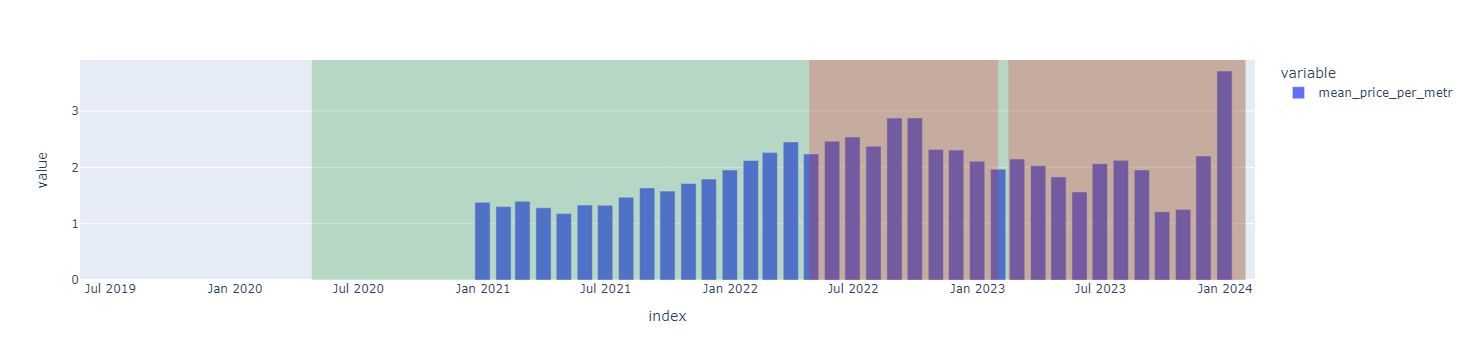

20.0 29.5


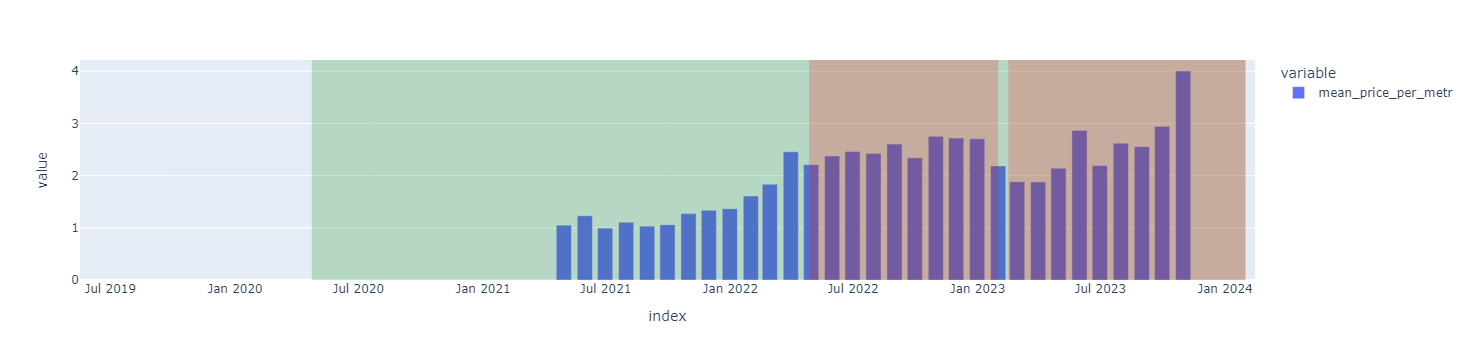

17.0 27.0


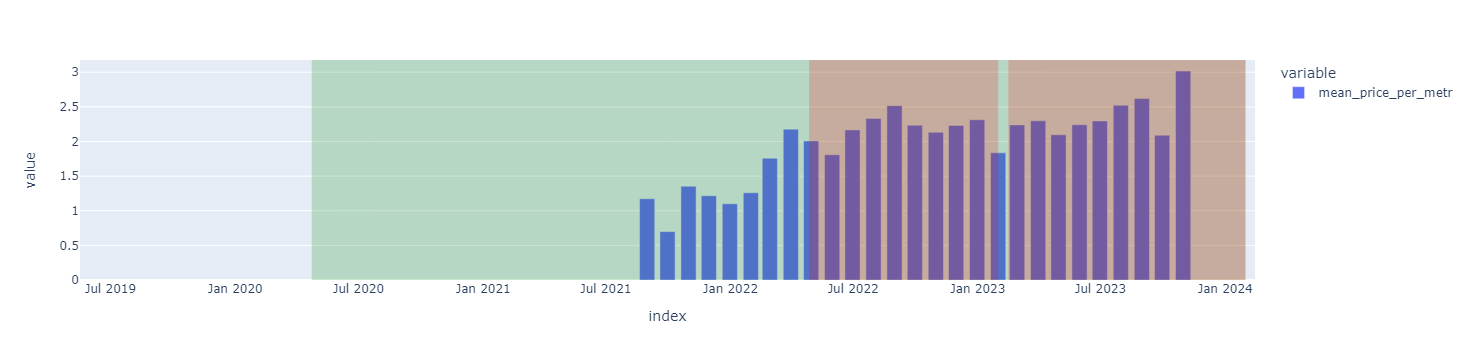

19.5 24.0


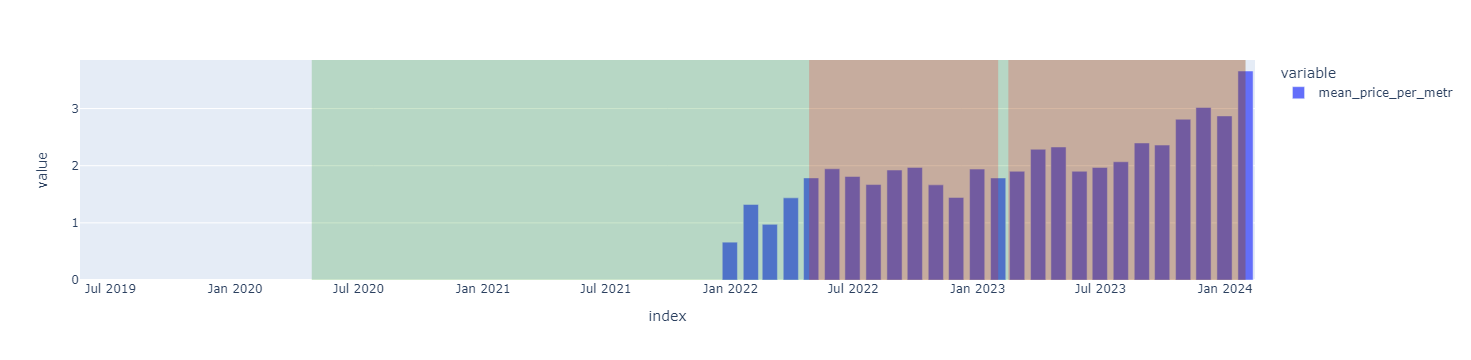

22.0 22.0


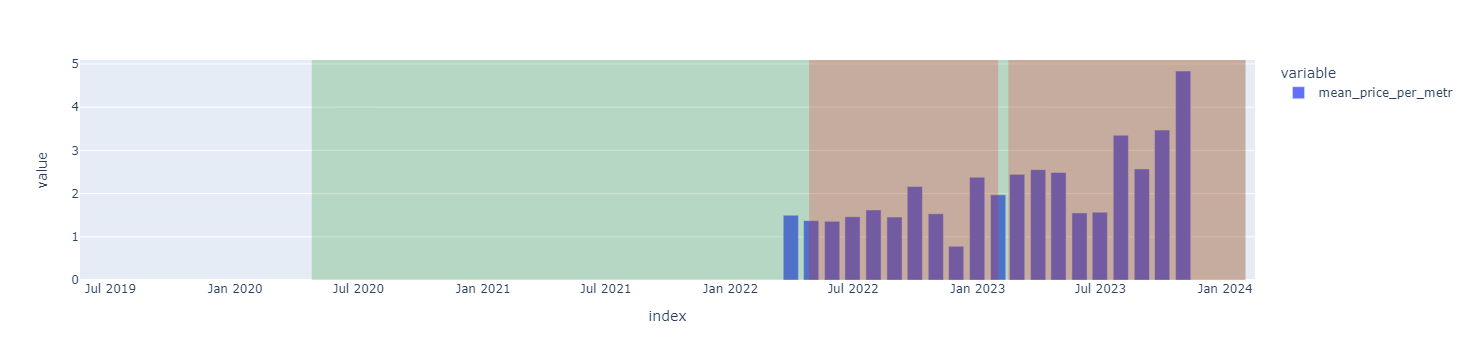

ValueError: cannot insert objectid, already exists

In [101]:
df['report_date'].unique()
horizon = 4
date_left = pd.to_datetime('2019-01-31')

for date_left in sorted(df['report_date'].unique())[3::horizon]:
    date_left = pd.to_datetime(date_left)
    date_right = date_left + MonthEnd(horizon)
    #display(df[df['open_date'].between(date_left, date_right)])
    df_filtered = df[df['open_date'].between(date_left, date_right) & (df['close_date'] < pd.to_datetime('2024-02-29'))]
    
    df_maturity = df_filtered.groupby('objectid').agg({'months_after_open': 'max'})
    #px.histogram(df_maturity, nbins=30).show()
    
    df_price = df_filtered.groupby('objectid').apply(lambda df: df.assign(
                                                            project_maturity = df['months_after_open'].max(),
                                                            mean_price_per_metr = StandardScaler().fit_transform(df[['mean_price_per_metr']].values) + 2)).reset_index()
    left_q = df_maturity.quantile(0.25)[0]
    right_q = df_maturity.quantile(0.75)[0]
    print(left_q, right_q)
    cond = df_price['project_maturity'].between(left_q, right_q) if len(df_maturity) > 5 else [True] * df_price.shape[0]
    
    agg_df = df_price[cond].groupby('report_date').agg({'mean_price_per_metr': 'mean'})
    
    
    fig = px.bar(pd.concat([pd.DataFrame(index = pd.date_range('2019-05-31', '2024-01-31', freq = 'M')), 
                      agg_df[(pd.to_datetime('2019-05-31') <= agg_df.index) & (agg_df.index <= pd.to_datetime('2024-01-31'))]], axis = 1))
    
    for d1, d2, color in lgot_list:
        fig.add_vrect(d1, d2, line_width = 0, fillcolor = color, opacity = 0.2)
    
    fig.show()

In [111]:
pd.DataFrame([[np.nan, 1, 2], [np.nan, 1, np.nan]]).mean(axis = 1)

0    1.5
1    1.0
dtype: float64

73.0 86.0


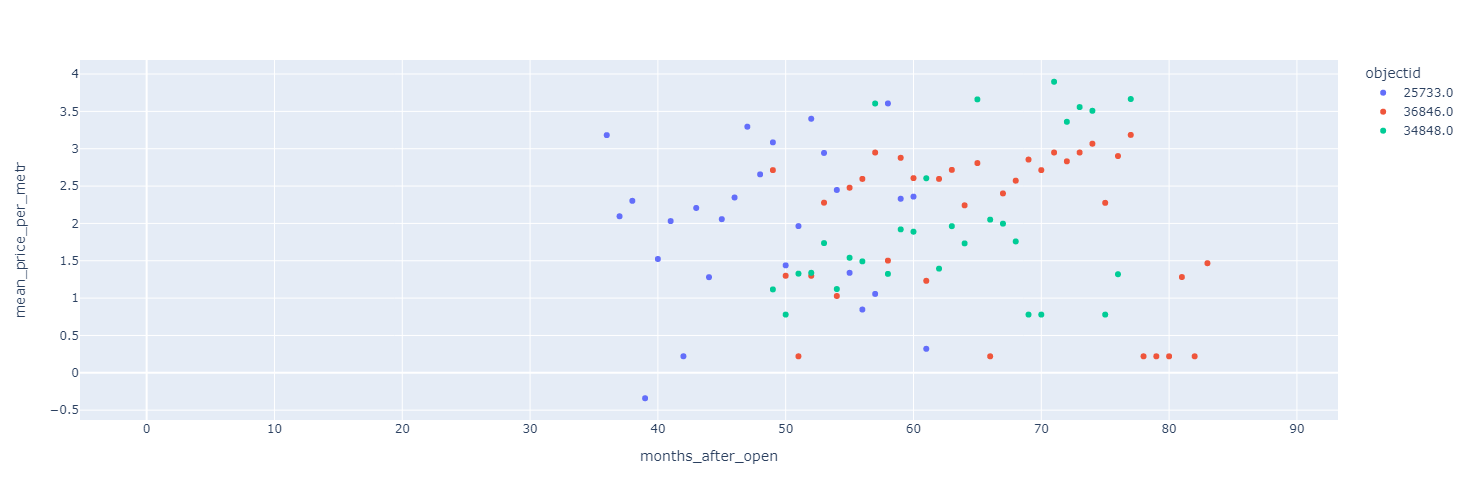

59.0 64.0


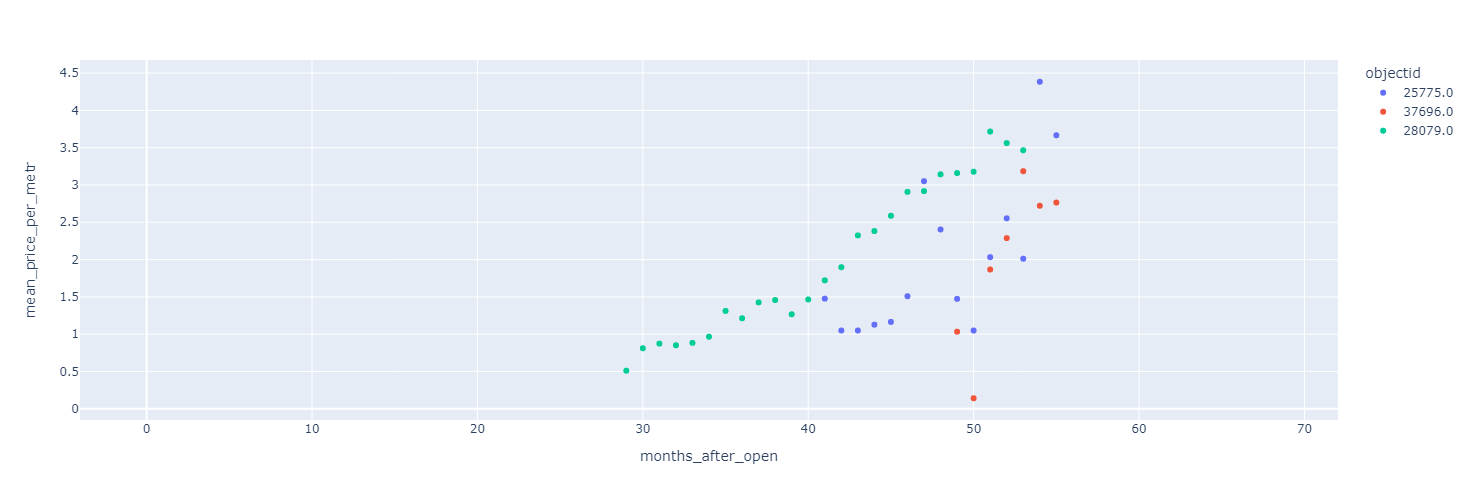

55.25 63.75


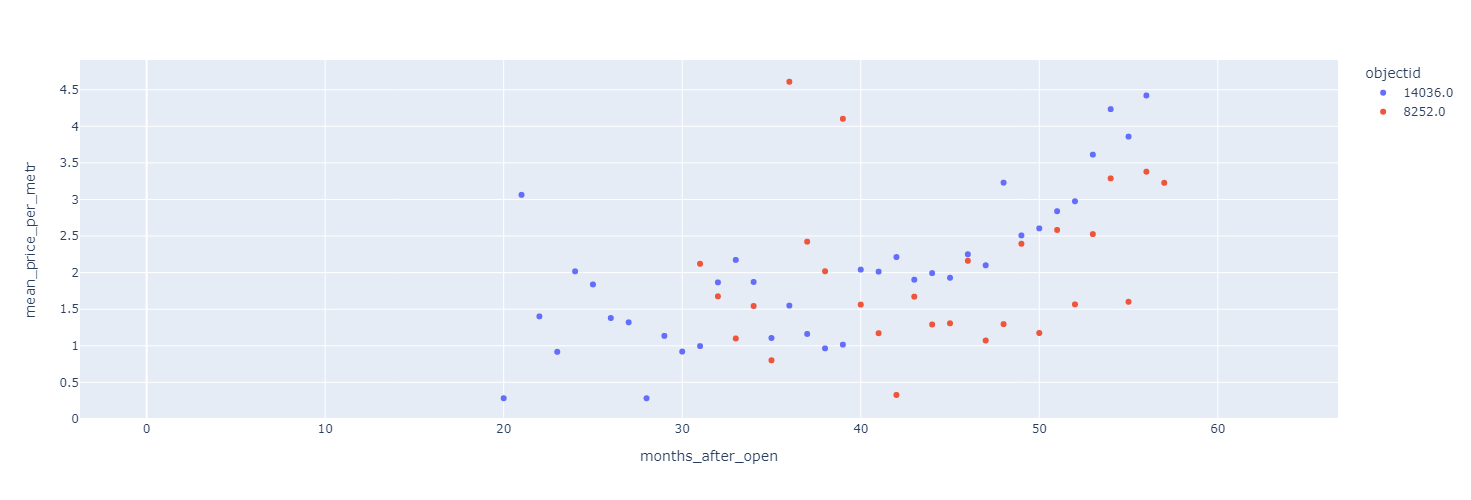

65.0 70.5


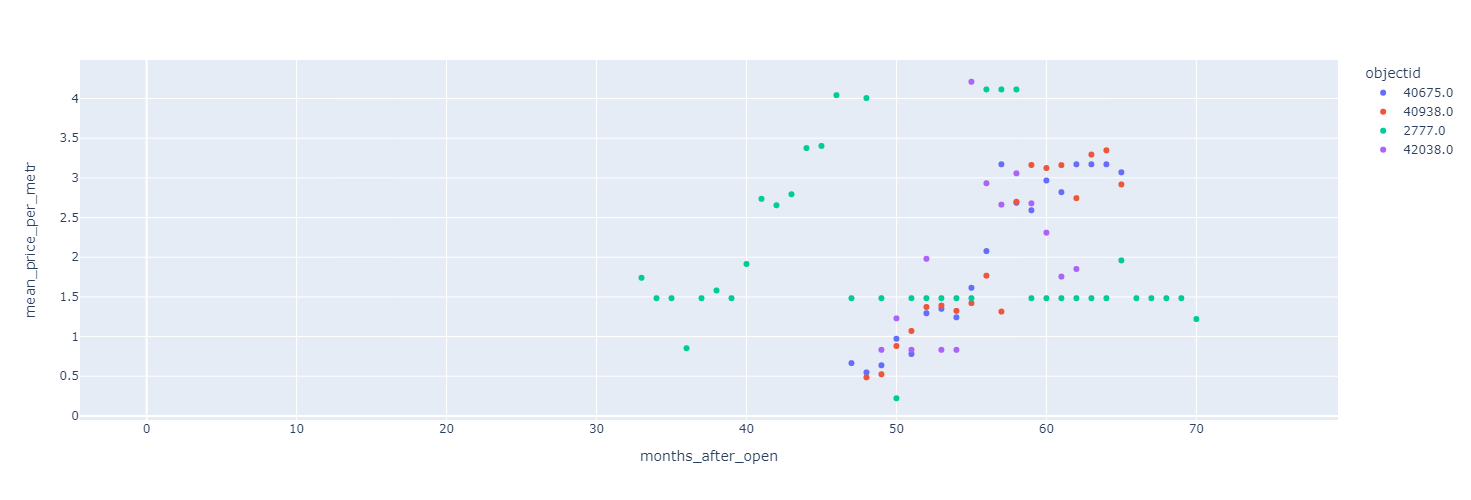

49.0 67.75


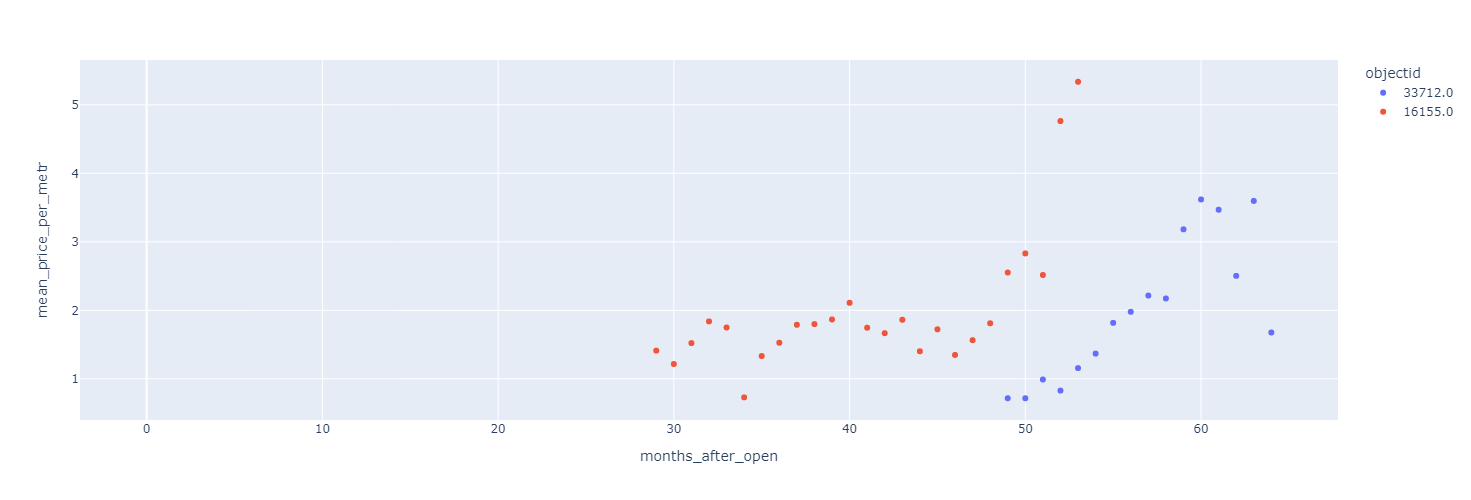

39.0 58.5


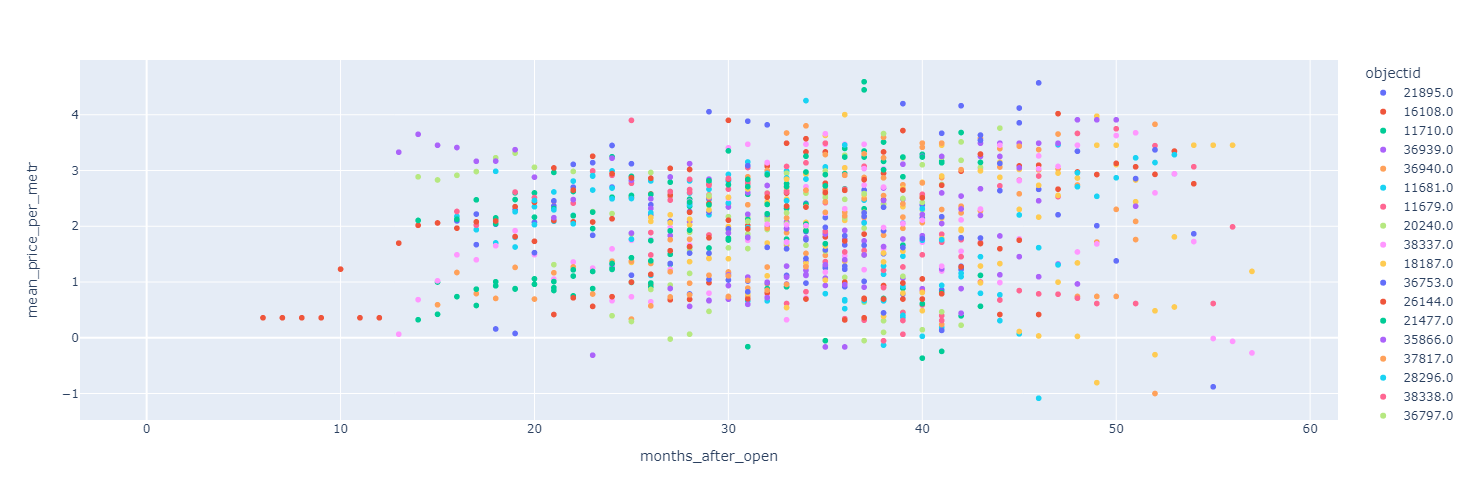

29.0 54.0


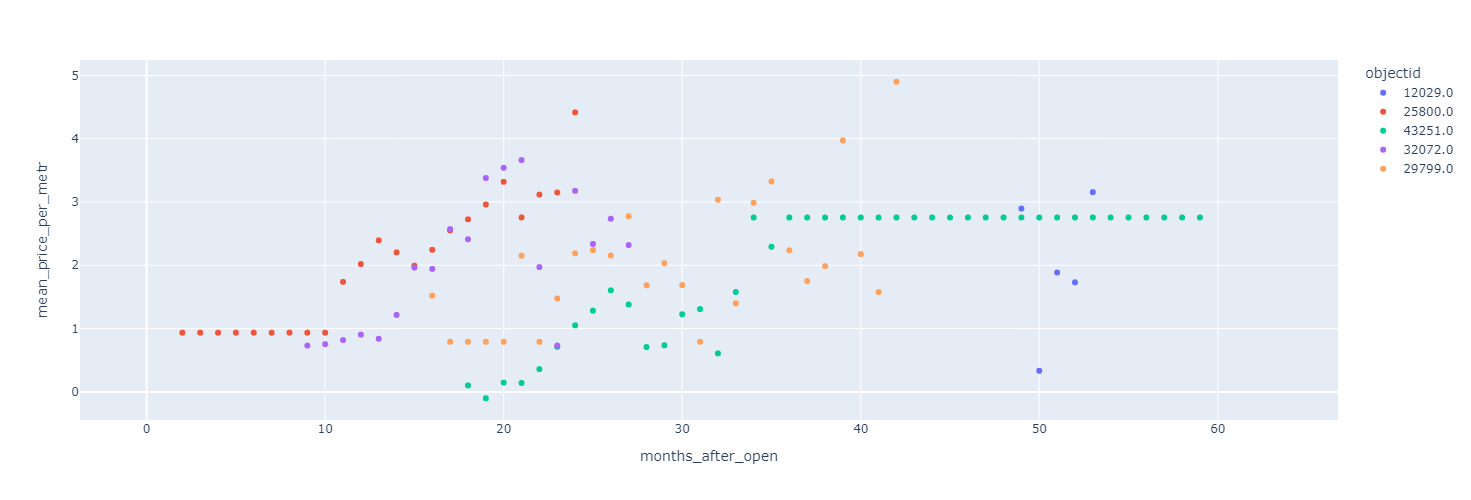

35.5 53.25


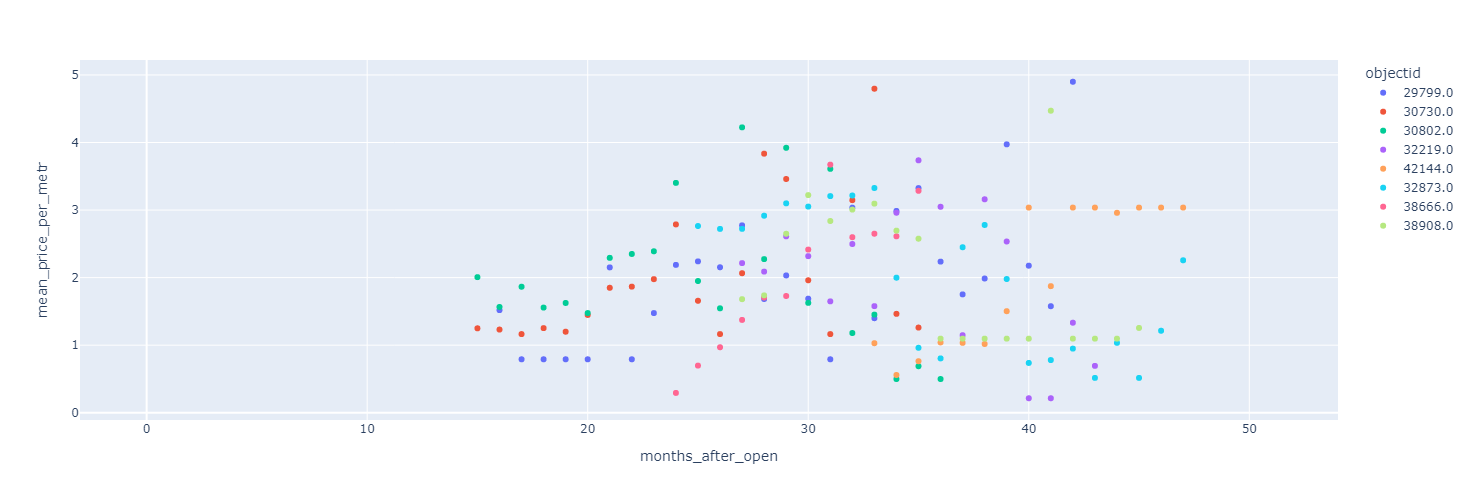

26.25 39.25


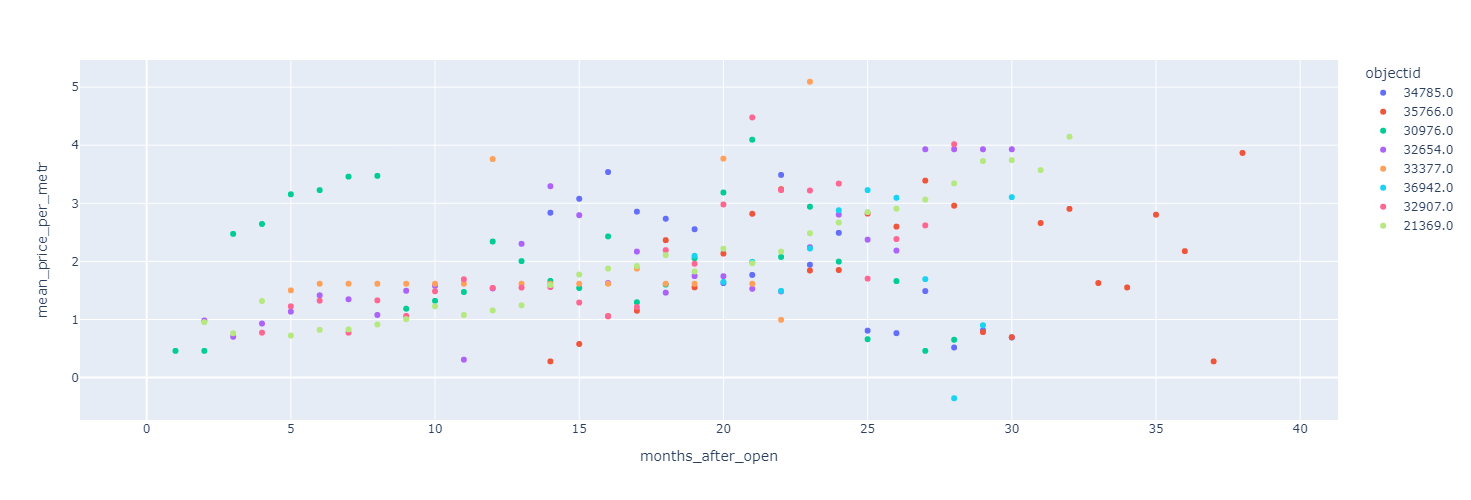

17.5 31.0


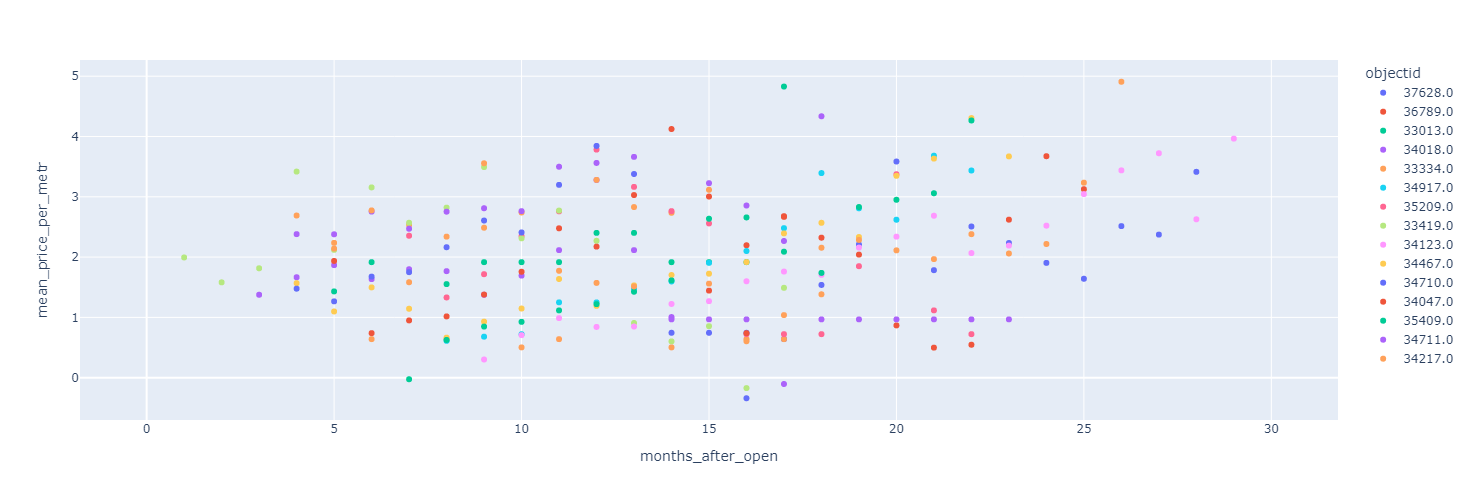

22.0 32.0


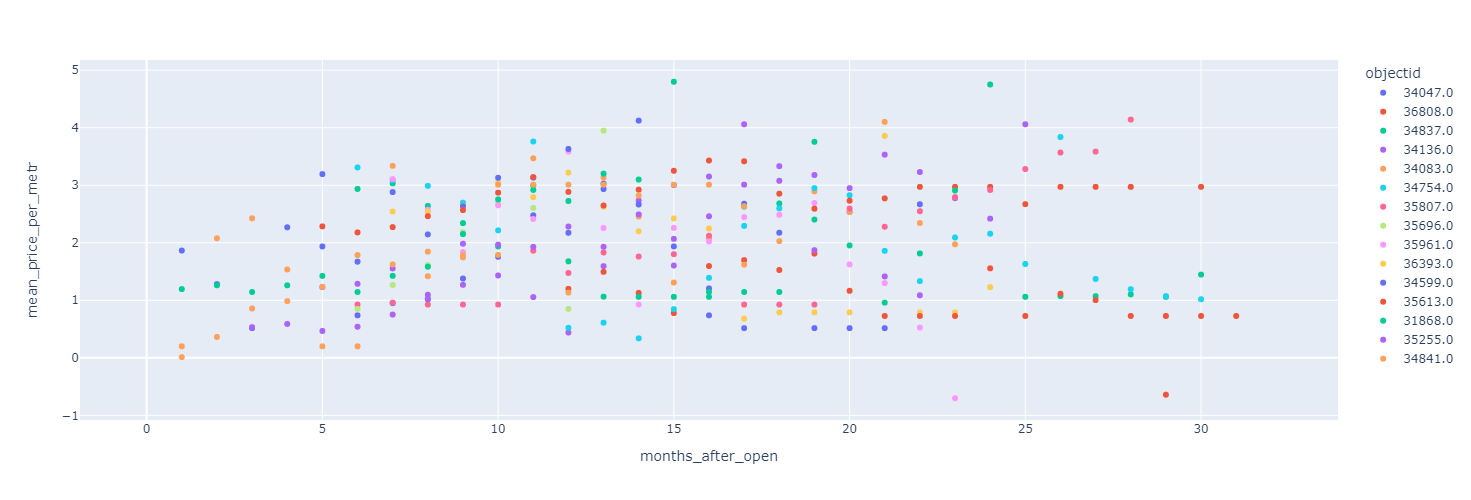

19.0 36.0


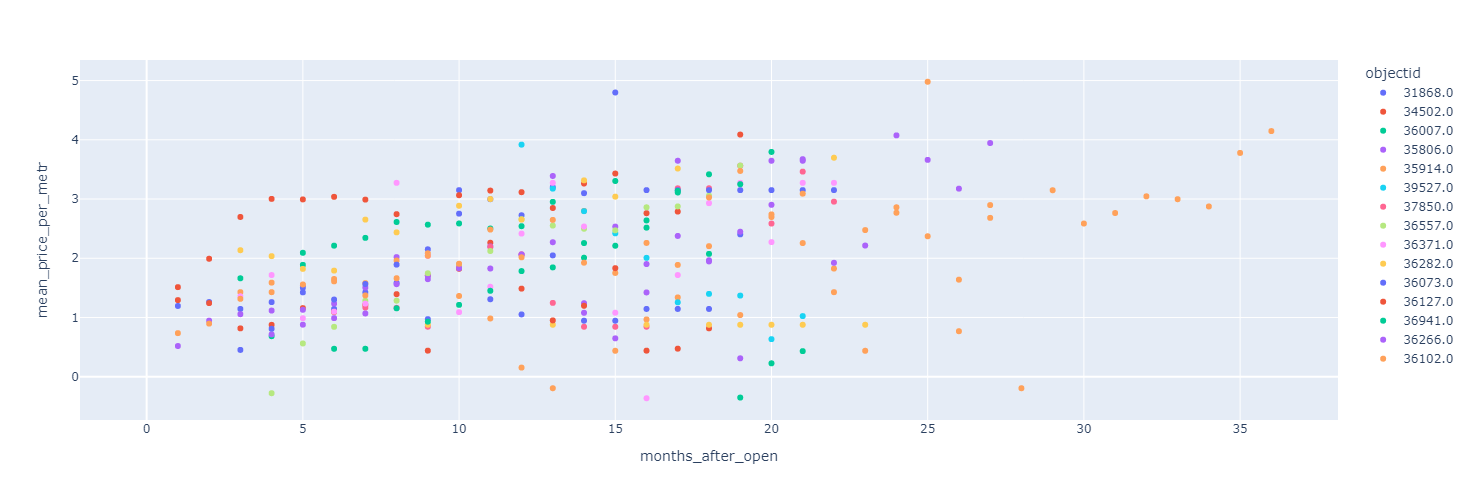

17.25 35.0


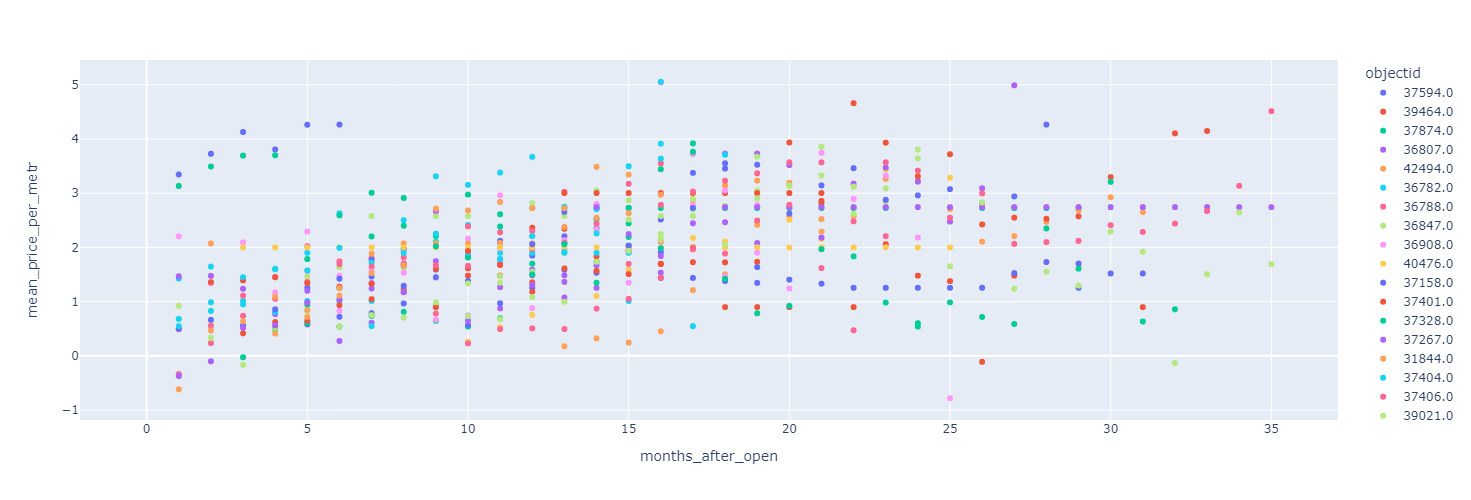

20.0 35.0


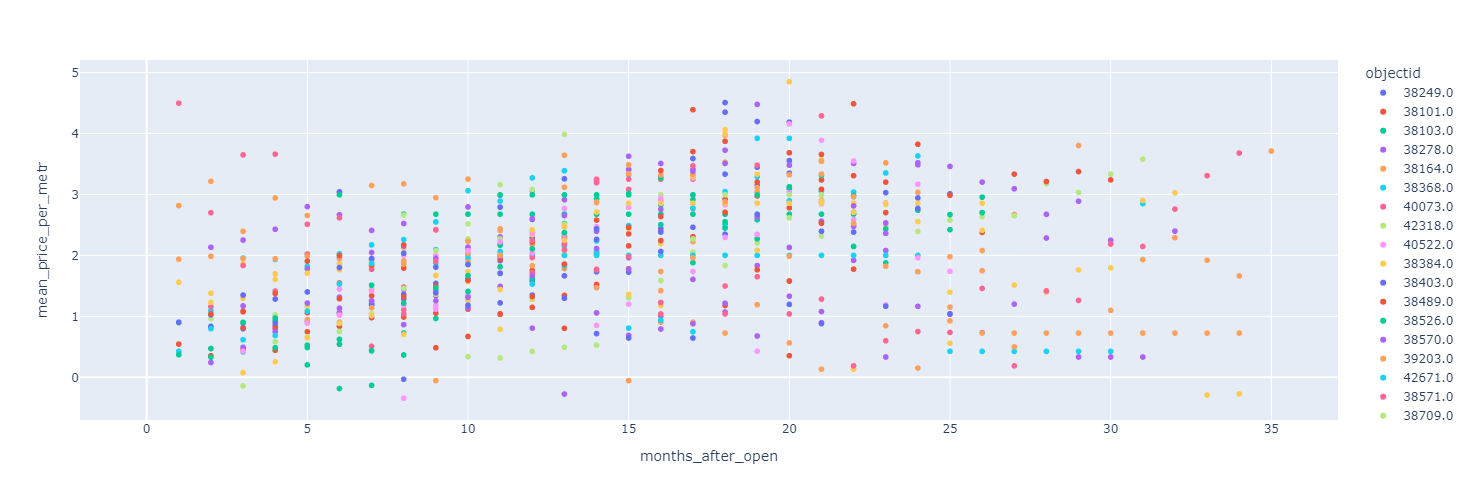

20.0 29.5


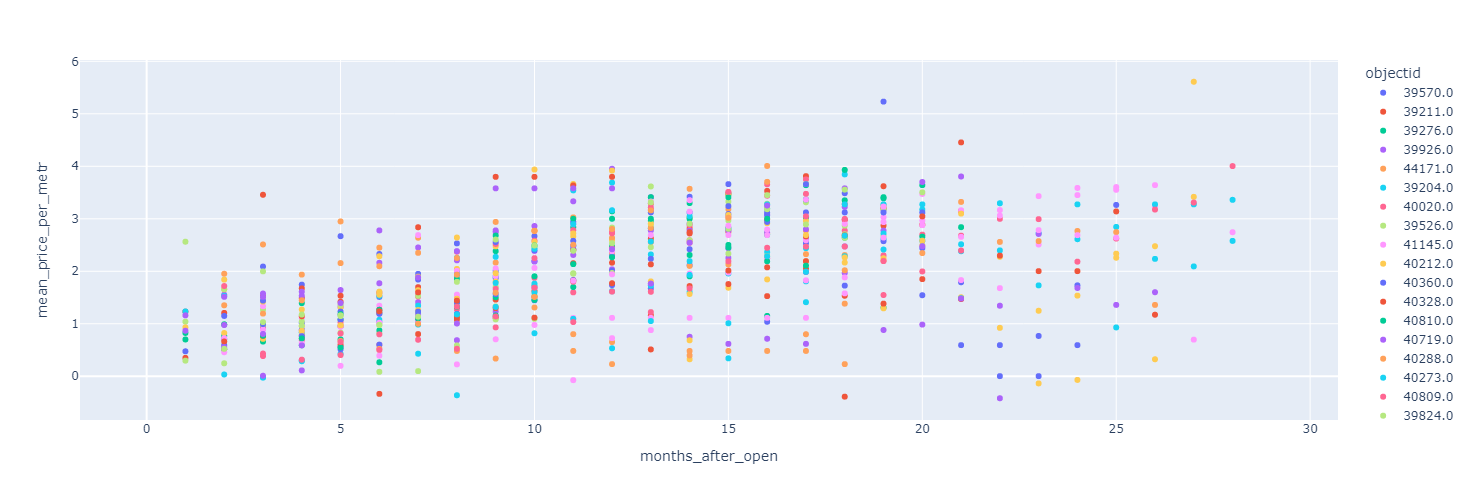

17.0 27.0


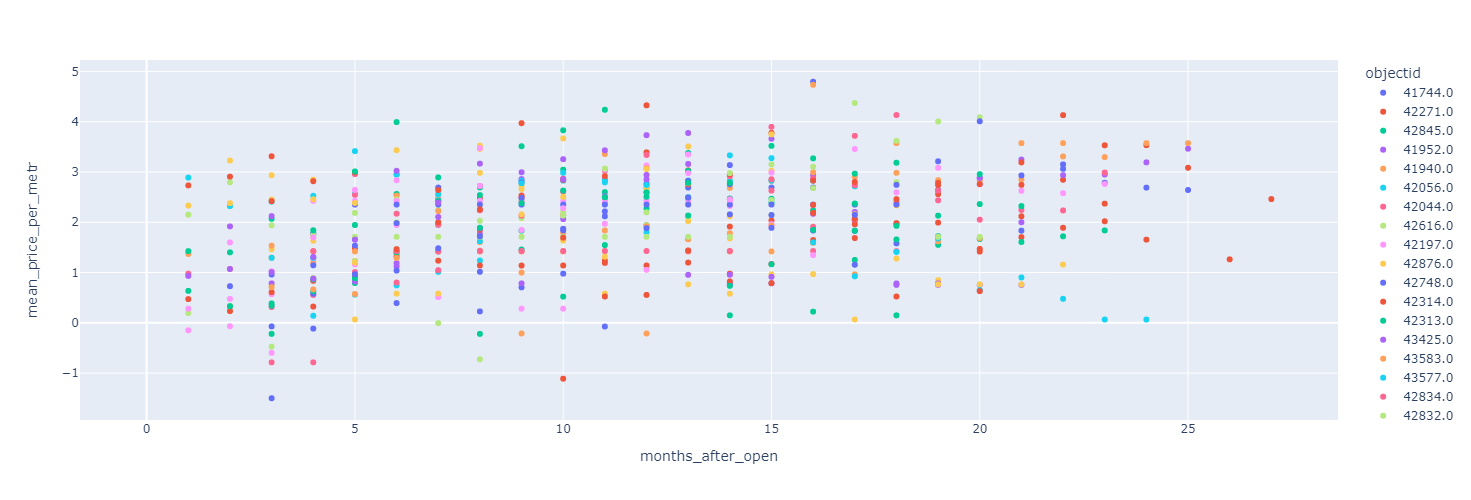

19.5 24.0


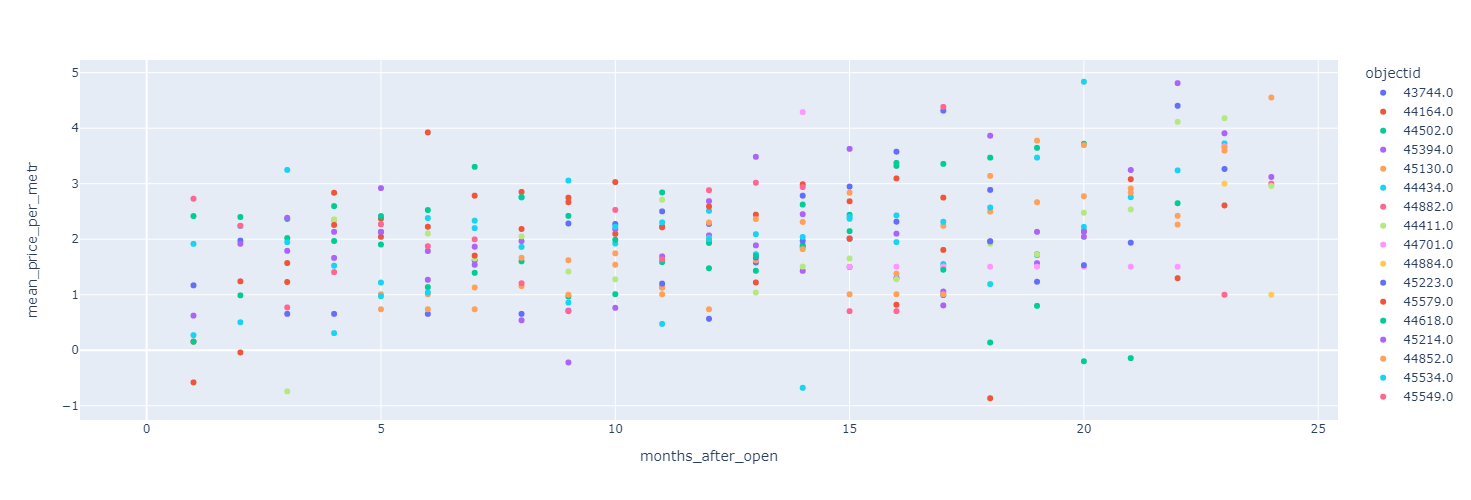

22.0 22.0


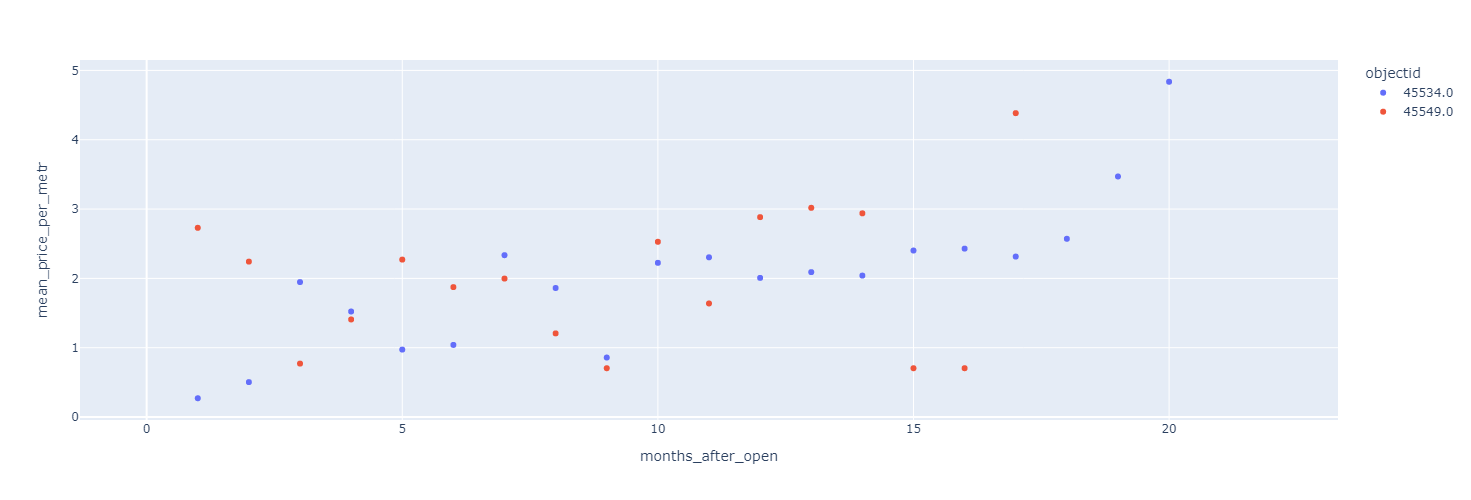

ValueError: cannot insert objectid, already exists

In [107]:
df['report_date'].unique()
horizon = 4
date_left = pd.to_datetime('2019-01-31')

for date_left in sorted(df['report_date'].unique())[3::horizon]:
    date_left = pd.to_datetime(date_left)
    date_right = date_left + MonthEnd(horizon)
    #display(df[df['open_date'].between(date_left, date_right)])
    df_filtered = df[df['open_date'].between(date_left, date_right) & (df['close_date'] < pd.to_datetime('2024-02-29'))]
    
    df_maturity = df_filtered.groupby('objectid').agg({'months_after_open': 'max'})
    #px.histogram(df_maturity, nbins=30).show()
    
    df_price = df_filtered.groupby('objectid').apply(lambda df: df.assign(
                                                            project_maturity = df['months_after_open'].max(),
                                                            mean_price_per_metr = StandardScaler().fit_transform(df[['mean_price_per_metr']].values) + 2)).reset_index()
    left_q = df_maturity.quantile(0.25)[0]
    right_q = df_maturity.quantile(0.75)[0]
    print(left_q, right_q)
    cond = df_price['project_maturity'].between(left_q, right_q) if len(df_maturity) > 5 else [True] * df_price.shape[0]
    
    agg_df = df_price[cond].groupby('report_date').agg({'mean_price_per_metr': 'mean'})
    
    
    fig = px.scatter(df_price[cond].astype({'objectid': 'str'}), x = 'months_after_open', y = 'mean_price_per_metr', color = 'objectid', width = 600, height = 500)
    
    fig.show()